In [76]:
from pfcc_extras import show_gui, view_ngl
from ase.io import Trajectory,read,write

In [79]:
traj=Trajectory("/home/jovyan/Kaori/MD/LiB_2/structure/MD_miller/tensile01/Al_NMC_Mn_decrease_010_P0.000_T300K_HT500K_tensile300K.traj")
traj3=Trajectory("/home/jovyan/Kaori/MD/LiB_2/structure/MD_Al/tensile01/Interface_Al_on_NMC_Co_decrease_001_P0.000_T300K_HT500K_tensile300K.traj")
traj2=Trajectory("/home/jovyan/Kaori/MD/LiB_2/structure/MD_Al/tensile01/Interface_Al_on_NMC_Co_decrease_010_P0.000_T300K_HT500K_tensile300K.traj")
# traj4=Trajectory("/home/jovyan/Kaori/MD/LiB_2/structure/MD_Al2O3/heat/Al2O3_NMC_Co_decrease_P0.000_T300K_equil.traj")
traj5=Trajectory("/home/jovyan/Kaori/MD/LiB_2/structure/pvdf_big222_700K.traj")
atoms=read("/home/jovyan/Kaori/MD/LiB_2/structure/output/30C12H12F12_nvt-prod_3300K-500Kps-25ps_final.xyz")
atoms=read("/home/jovyan/Kaori/MD/LiB_2/structure/Al2O3_NMC/Interface_Al2O3_on_NMC_Co_decrease_010.cif")
traj6=read("/home/jovyan/Kaori/MD/LiB_2/structure/MD_miller/heat/Al2O3_NMC_NMC523_approx_010_P0.000_T300K_HT500K.traj")
# atoms=read('/home/jovyan/Kaori/MD/LiB_2/structure/Al_NMC/Interface_Al_on_NMC_Ni_decrease_010.cif')
atoms.set_cell([0,0,0])

In [71]:
# show_gui(traj4)
len(traj6)

918

In [41]:
traj2[1].get_stress()

array([ 4.37733572e-03,  5.59333320e-03,  4.95472061e-03, -2.73806049e-04,
        3.73989065e-05, -5.95925333e-04])

In [81]:
show_gui(traj3)

In [25]:
traj2[1].get_chemical_symbols

<bound method Atoms.get_chemical_symbols of Atoms(symbols='Al10Co30Li101Mn22Ni72O212', pbc=True, cell=[11.760945769999998, 12.45, 65.19443771], momenta=..., calculator=SinglePointCalculator(...))>

In [3]:
al2o3=read("/home/jovyan/Kaori/MD/LiB_2/Al555.xyz")

In [5]:
traj[1].cell

Cell([1062.750282340136, 1062.750282340136, 6415.365775795666])

In [6]:
import numpy as np
# from ase import Atoms # 例としてASEをインポート

# al2o3というAtomsオブジェクトが既にあると仮定します
# 例: al2o3 = Atoms(...) 
positions = al2o3.get_positions()

# positionsは [[x1, y1, z1], [x2, y2, z2], ...] のようなNumPy配列です

# 1. すべての原子のz座標を取得します (配列のスライシング)
z_coords = positions[:, 2]  # 3番目の列（インデックスは2）がz座標

# 2. z座標の最大値を取得します
max_z = np.max(z_coords)
# または Pythonの組み込み関数でも可能
# max_z = max(z_coords)


print(f"原子のz座標の最大値: {max_z}")

# set_cell()について
# これは原子の座標ではなく、シミュレーションセルの大きさと形を設定するメソッドです。
# 例えば、セルのz方向の長さを取得したい場合は、以下のようにします。
al2o3.set_cell()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [55]:
from pfcc_extras import show_gui, view_ngl
from ase.io import Trajectory,read,write
pvdf2=read("pvdf_big222.xyz") 
pvdf=pvdf2.copy()
positions=pvdf.get_positions()
cell=pvdf.cell
# cell=[13,18,positions[:,0].max()]
# pvdf.positions[:,0] =-positions[:,0].min()
final_box=read("water_box_repeated.xyz")
# pvdf.set_cell(cell)
# # positions[:,1].max(),positions[:,2].max(),positions[:,0].max(),
# big_pvdf=pvdf.repeat((4,4,1))
# # show_gui(big_pvdf)
big_final_box=final_box.copy()
big_final_box.set_cell((big_final_box.positions[:,0].max(),big_final_box.positions[:,1].max(),big_final_box.positions[:,2].max()))
big_final_box=big_final_box.repeat((4,4,1))
interface=build_interface(big_final_box, pvdf, target_xy=(cell[0,0],cell[1,1]), separation=0.5)
write("pvdf222_water.xyz",interface)
# positions=pvdf.get_positions()
# positions[:,1].max(),positions[:,2].max(),positions[:,0].max(),
cell[0]

    1. 界面を構築中...


array([26.,  0.,  0.])

In [63]:
# list=["NVE", "Langevin", "NVT_Berendsen", "NPT_Berendsen", "NPT"]

# show_gui(Trajectory(f"md_trajectory_{list[2]}.traj"))
# show_gui(Trajectory("/home/jovyan/Kaori/MD/LiB_2/structure/NVT_1500K1.traj"))
# h2o=read("300H2O_2.xyz")
# h2o.cell
# show_gui(h2o)
# from pfcc_extras import show_gui, view_ngl
# from ase.io import Trajectory,read,write
# # pvdf2=read(".xyz") 
# # pvdf=pvdf2.copy()
# positions=h2o.get_positions()
# cell=[positions[:,1].max(),positions[:,2].max(),positions[:,0].max()]
# h2o.positions[:,0]-=positions[:,0].min()
# h2o.positions[:,1] -=positions[:,1].min()
# h2o.positions[:,2] -=positions[:,2].min()
# write("300H2O_3.xyz",h2o)
# positions=h2o.get_positions()
# cell=[positions[:,0].max(),positions[:,1].max(),positions[:,2].max()]
# h2o.set_cell(cell)
# write("300H2O_4.xyz",h2o)
# show_gui(h2o)
# cell
# show_gui(Trajectory("pvdf_water_opt2.traj"))
# show_gui(Trajectory("/home/jovyan/tutorial/matlantis-contrib/matlantis_contrib_examples/epoxy_pyrolysis/output/15C39H44O7_opt_v6cU0d3.traj"))
# show_gui(Trajectory("pvdf_water_random2_600K.traj"))
show_gui(Trajectory("lg_compressed.traj"))
# show_gui(Trajectory("output/30C12H12F12_nvt-eq_v6cU0d3.traj"))
# show_gui(Trajectory("output/30C12H12F12_nvt-prod_2800K-500Kps-25ps.traj"))
# show_gui(Trajectory("/home/jovyan/tutorial/matlantis-contrib/matlantis_contrib_examples/epoxy_pyrolysis/output/15C39H44O7_nvt-prod_2300K-250Kps-25ps.traj"))
# traj=Trajectory("pvdf_big222_700K.traj")

In [65]:
## Matlantis Features
from matlantis_features.utils.calculators import pfp_estimator_fn
from matlantis_features.atoms import MatlantisAtoms
from matlantis_features.features.common.opt import FireLBFGSASEOptFeature
from matlantis_features.features.md import (ASEMDSystem, MDFeature, MDExtensionBase,
                                            NVTBerendsenIntegrator, NPTIntegrator, NPTBerendsenIntegrator)
from matlantis_features.features.md.md_extensions import TemperatureScheduler


In [66]:
help(MDFeature)

Help on class MDFeature in module matlantis_features.features.md.md:

class MDFeature(matlantis_features.features.base.FeatureBase)
 |  MDFeature(integrator: matlantis_features.features.md.md_integrator_base.MDIntegratorBase, n_run: int, checkpoint_file_name: Optional[str] = None, checkpoint_freq: Optional[int] = 10, traj_file_name: Optional[str] = None, traj_freq: Optional[int] = 1, traj_props: Optional[List[str]] = None, traj_append: bool = False, traj_init_frame: bool = False, show_progress_bar: bool = False, tqdm_options: Optional[Dict[str, Any]] = None, show_logger: bool = False, logger_interval: int = 100, estimator_fn: Optional[Callable[[], pfp_api_client.pfp.estimator.Estimator]] = None)
 |  
 |  The matlantis-feature for molecular dynamics simulation.
 |  
 |  Method resolution order:
 |      MDFeature
 |      matlantis_features.features.base.FeatureBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __call__ = decorated(self, system: matlantis_features.featur

In [58]:
pip install packmol

Looking in indexes: https://pypi.org/simple, http://pypi.artifact.svc:8080/simple
ERROR: Could not find a version that satisfies the requirement packmol (from versions: none)

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
ERROR: No matching distribution found for packmol
Note: you may need to restart the kernel to use updated packages.


In [59]:
from pfcc_extras.liquidgenerator.liquid_generator import LiquidGenerator

In [60]:
help(LiquidGenerator)

Help on class LiquidGenerator in module pfcc_extras.liquidgenerator.liquid_generator:

class LiquidGenerator(builtins.object)
 |  LiquidGenerator(engine: str = 'packmol', composition: List = [], **kwargs)
 |  
 |  Liquid generator wrapper of 2 engines, [packmol, torch].
 |  The initialized input should have composition which represents the contents of molecules.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, engine: str = 'packmol', composition: List = [], **kwargs)
 |      Initialization of the liquid generator
 |      
 |      Args:
 |          engine (str, optional): The backend engine of liquid generator. Chosen from ["packmol", "torch"]. Defaults to "packmol".
 |          composition (List, optional): The atoms information to generate liquid. Defaults to [].
 |          **kwargs:
 |              For common
 |                  cell: The format is not same for packmol and torch engine
 |                      packmol format: {"lx": x, "ly": y, "lz": z}
 |                     

グラフを output/fragment_evolution_summary.png に保存しました。


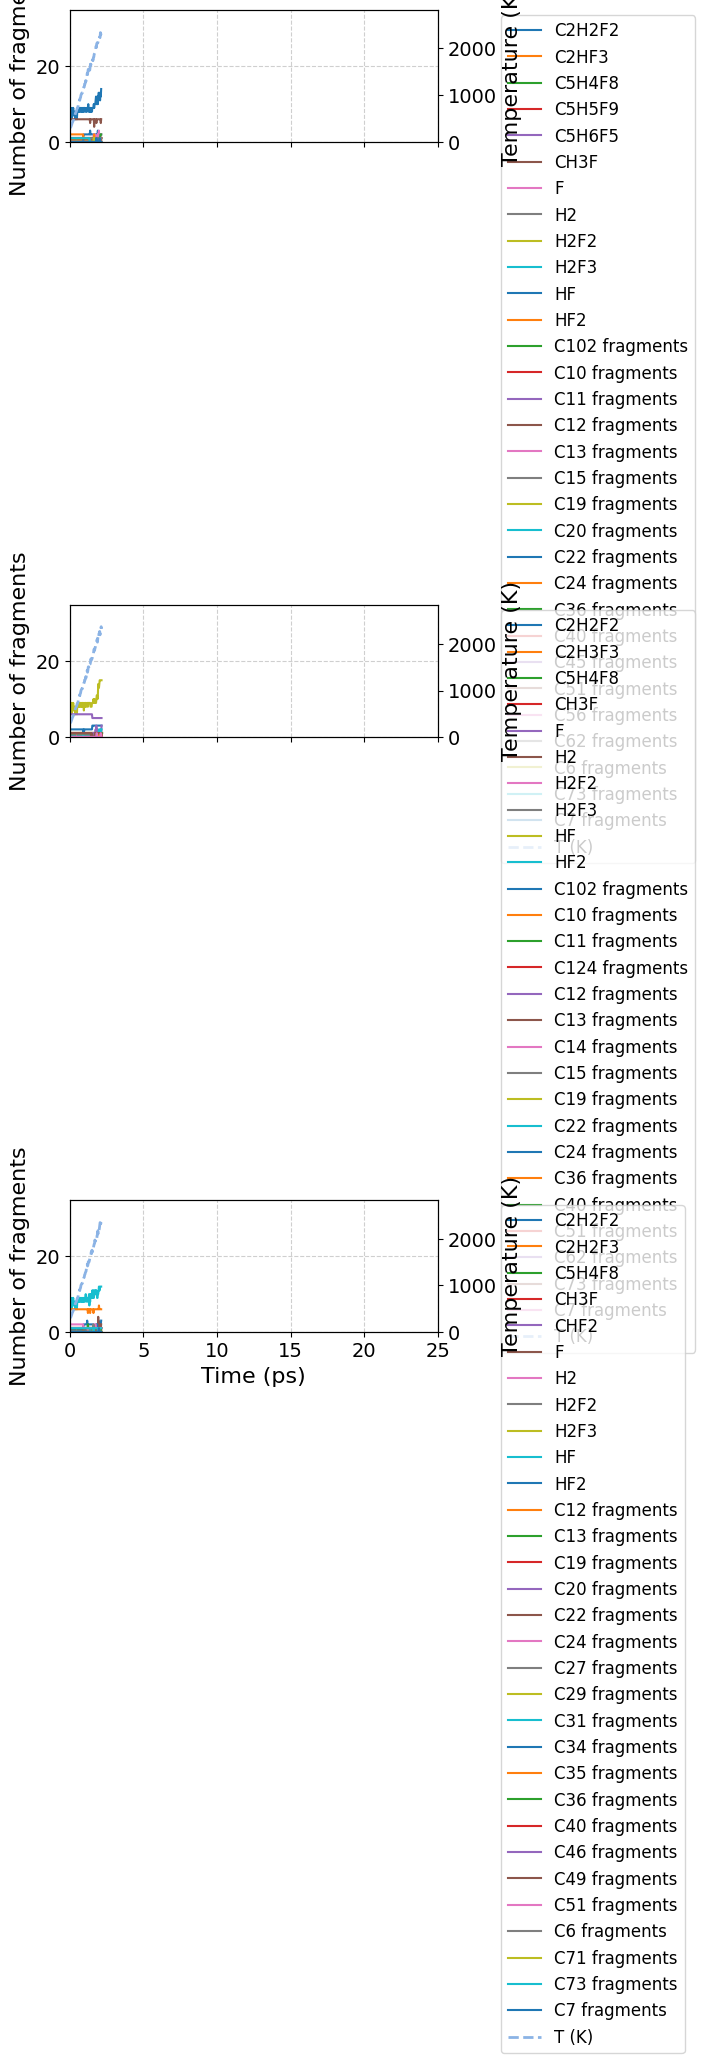

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import defaultdict

def get_carbon_count(formula: str) -> int:
    """分子式から炭素原子の数を抽出する。"""
    # 'C' の後に数字が続く場合 (例: C12H12)
    match = re.search(r'C(\d+)', formula)
    if match:
        return int(match.group(1))
    # 'C' の後に他の大文字アルファベットが続くか、文字列の末尾にある場合 (例: CO, CH4)
    if 'C' in formula and (len(formula) == formula.find('C') + 1 or formula[formula.find('C') + 1].isupper()):
        return 1
    return 0

# --- 1. データの読み込みと前処理 ---

# 以前のステップで生成されたCSVファイルのリスト
csv_files = [
    'evolution_30C12H12F12_nvt-prod_2800K-500Kps-25ps.csv',
    'evolution_30C12H12F12_nvt-prod_3300K-500Kps-25ps.csv',
    'evolution_30C12H12F12_nvt-prod_4300K-500Kps-25ps.csv',
]

processed_dfs = []
for file in csv_files:
    try:
        df = pd.read_csv(file)
    except FileNotFoundError:
        print(f"警告: ファイルが見つかりません: {file}。スキップします。")
        continue

    # C > 5 の分子をグループ化するための辞書
    #例: {'C12': ['C12H12F12', 'C12H10F12'], 'C6': [...]}
    c_groups = defaultdict(list)
    
    # 時間と温度以外の列（分子式）をループ
    mol_cols = [col for col in df.columns if col not in ['frame', 'time_ps', 'temperature_K']]
    
    for col in mol_cols:
        c_count = get_carbon_count(col)
        if c_count > 5:
            c_groups[f'C{c_count}'].append(col)
    
    # グループ化した分子の数を合計して新しい列を作成
    for group_name, members in c_groups.items():
        df[f'{group_name} fragments'] = df[members].sum(axis=1)
    
    # 元の集計済み分子の列を削除
    cols_to_drop = [member for members in c_groups.values() for member in members]
    df.drop(columns=cols_to_drop, inplace=True)
    
    processed_dfs.append(df)

# --- 2. グラフのプロット ---

if processed_dfs:
    # グラフのスタイル設定
    # colors = {
    #     'C12 fragments': '#C65D4D',
    #     'CH2O': '#E66D0F',
    #     'CO': '#729238',
    #     'H2O': '#7230A4',
    #     'H2': '#0AB450',
    #     'CH4': '#1E4E7E',
    # }
    
    fig, axes = plt.subplots(
        nrows=len(processed_dfs), 
        ncols=1, 
        figsize=(9, 6 * len(processed_dfs)), # グラフの数に応じて高さを調整
        sharex=True
    )
    # axesが単一オブジェクトの場合、リストに変換
    if len(processed_dfs) == 1:
        axes = [axes]

    for i, df in enumerate(processed_dfs):
        ax1 = axes[i]
        ax2 = ax1.twinx()

        # 分子ごとのプロット
        for col in df.columns:
            if col in ['frame', 'time_ps', 'temperature_K']:
                continue
            ax1.plot(df['time_ps'], df[col], label=col)

        # 温度のプロット
        ax2.plot(df['time_ps'], df['temperature_K'], label="T (K)", linewidth=2, c='#8BB3E5', linestyle='--')
        
        # 凡例の結合と表示
        h1, l1 = ax1.get_legend_handles_labels()
        h2, l2 = ax2.get_legend_handles_labels()
        ax1.legend(h1 + h2, l1 + l2, loc='upper left', fontsize=12, bbox_to_anchor=(1.15, 1.02))

        # 軸ラベルと範囲の設定
        ax1.set_ylabel("Number of fragments", fontsize=16)
        ax2.set_ylabel("Temperature (K)", fontsize=16)
        ax1.set_xlim(0, 25)
        ax1.set_ylim(0, 35) # y軸の上限を少し広げる
        ax2.set_ylim(0, max(df['temperature_K']) * 1.2) # 温度の最大値に応じて調整
        
        # パラメータの文字サイズ設定
        ax1.tick_params(labelsize=14)
        ax2.tick_params(labelsize=14)
        ax1.grid(linestyle='--', alpha=0.6)

    # 共通のX軸ラベル
    axes[-1].set_xlabel("Time (ps)", fontsize=16)
    
    # レイアウトの調整と保存
    fig.tight_layout(rect=[0, 0, 0.85, 1]) # 凡例スペースを確保
    output_filename = 'output/fragment_evolution_summary.png'
    fig.savefig(output_filename)
    print(f"グラフを {output_filename} に保存しました。")
else:
    print("プロット対象のデータがありませんでした。")

グラフを output/fragment_evolution_summary_auto_scaled.png に保存しました。


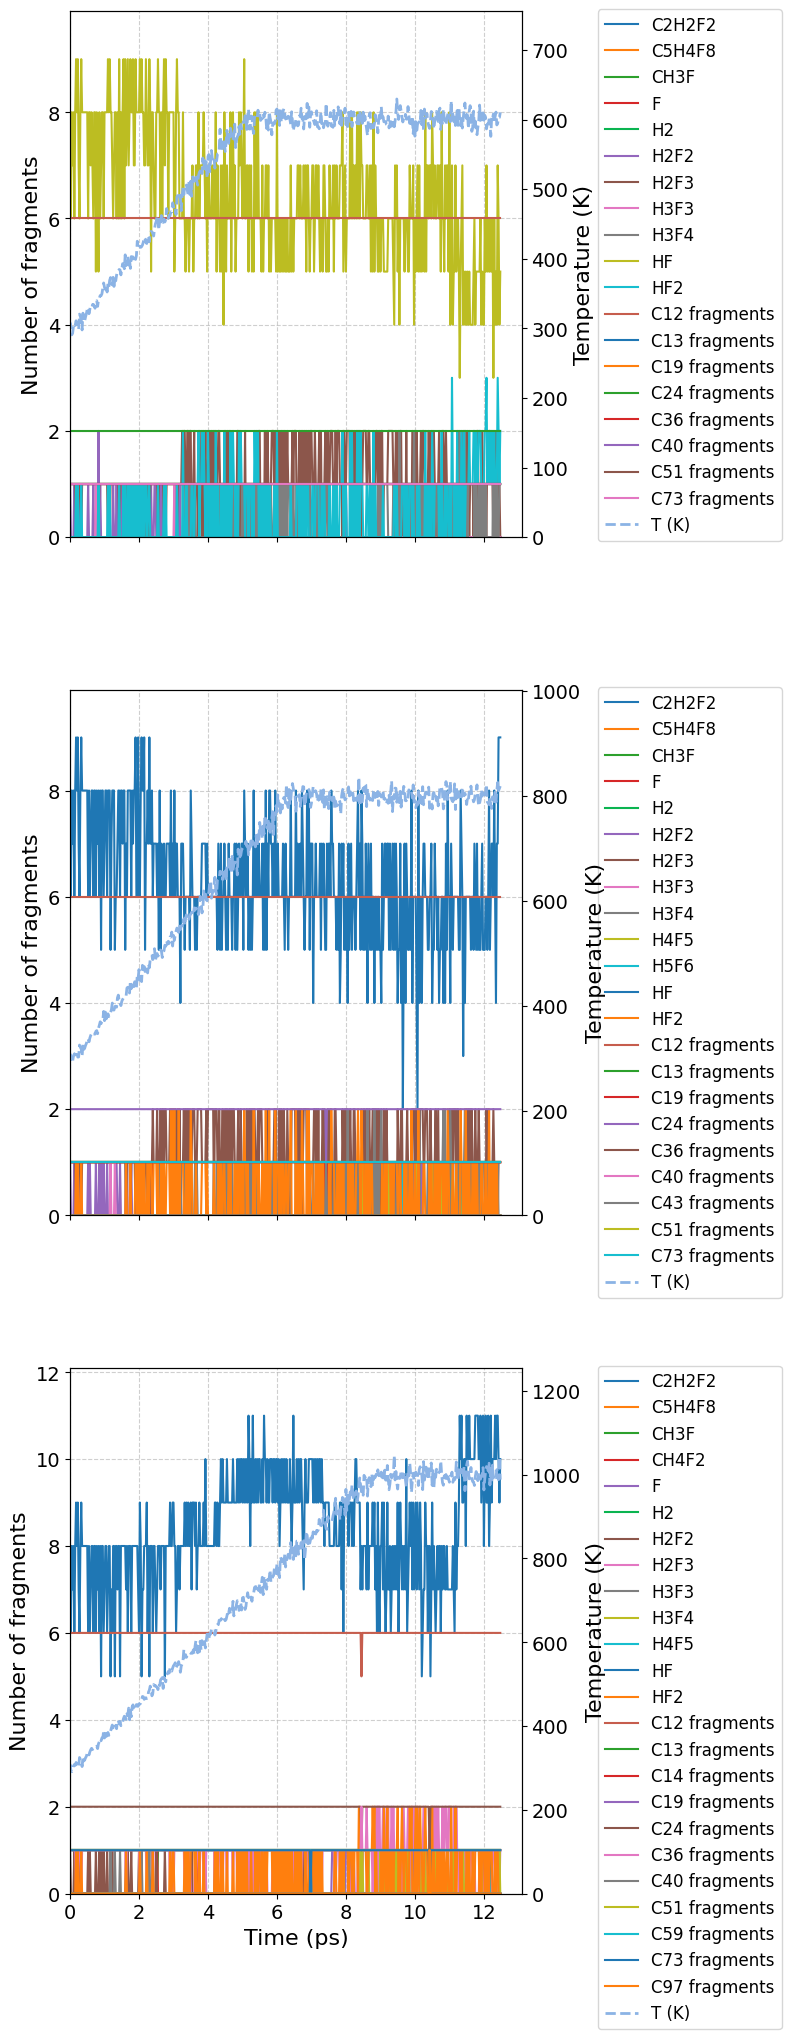

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import defaultdict

def get_carbon_count(formula: str) -> int:
    """分子式から炭素原子の数を抽出する。"""
    match = re.search(r'C(\d+)', formula)
    if match:
        return int(match.group(1))
    if 'C' in formula and (len(formula) == formula.find('C') + 1 or formula[formula.find('C') + 1].isupper()):
        return 1
    return 0

# --- 1. データの読み込みと前処理 (変更なし) ---

csv_files = [
    'evolution_30C12H12F12_nvt-prod_600K-30Kps-25ps.csv',
    'evolution_30C12H12F12_nvt-prod_800K-40Kps-25ps.csv',
    'evolution_30C12H12F12_nvt-prod_1000K-40Kps-25ps.csv',
]

processed_dfs = []
for file in csv_files:
    try:
        df = pd.read_csv(file)
    except FileNotFoundError:
        print(f"警告: ファイルが見つかりません: {file}。スキップします。")
        continue

    c_groups = defaultdict(list)
    mol_cols = [col for col in df.columns if col not in ['frame', 'time_ps', 'temperature_K']]
    
    for col in mol_cols:
        c_count = get_carbon_count(col)
        if c_count > 5:
            c_groups[f'C{c_count}'].append(col)
    
    for group_name, members in c_groups.items():
        df[f'{group_name} fragments'] = df[members].sum(axis=1)
    
    cols_to_drop = [member for members in c_groups.values() for member in members]
    df.drop(columns=cols_to_drop, inplace=True, errors='ignore')
    
    processed_dfs.append(df)

# --- 2. グラフのプロット (軸設定を自動調整) ---

if processed_dfs:
    colors = {
        'C12 fragments': '#C65D4D', 'CH2O': '#E66D0F', 'CO': '#729238',
        'H2O': '#7230A4', 'H2': '#0AB450', 'CH4': '#1E4E7E',
    }
    
    fig, axes = plt.subplots(
        nrows=len(processed_dfs), ncols=1, 
        figsize=(10, 7 * len(processed_dfs)), # 横幅を少し広げる
        sharex=True
    )
    if len(processed_dfs) == 1:
        axes = [axes]

    for i, df in enumerate(processed_dfs):
        ax1 = axes[i]
        ax2 = ax1.twinx()

        # 分子ごとのプロット
        frag_cols = [col for col in df.columns if col not in ['frame', 'time_ps', 'temperature_K']]
        for col in frag_cols:
            ax1.plot(df['time_ps'], df[col], label=col, c=colors.get(col, None))

        # 温度のプロット
        ax2.plot(df['time_ps'], df['temperature_K'], label="T (K)", linewidth=2, c='#8BB3E5', linestyle='--')
        
        # 凡例の結合と表示
        h1, l1 = ax1.get_legend_handles_labels()
        h2, l2 = ax2.get_legend_handles_labels()
        ax1.legend(h1 + h2, l1 + l2, loc='upper left', fontsize=12, bbox_to_anchor=(1.15, 1.02))

        # ==================================================================
        # ▼▼▼ 軸範囲の自動調整 ▼▼▼
        # ==================================================================
        # X軸: time_psの最大値に少し余白を持たせる
        max_time = df['time_ps'].max()
        ax1.set_xlim(0, max_time * 1.05)

        # Y軸 (左): 全フラグメント数の最大値に余白を持たせる
        # df[frag_cols]でフラグメントデータのみを抽出し、その中の最大値を探す
        max_frag_count = df[frag_cols].max().max()
        ax1.set_ylim(0, max_frag_count * 1.1) # 10%の余白
        
        # Y軸 (右): 温度の最大値に応じて調整
        max_temp = df['temperature_K'].max()
        ax2.set_ylim(0, max_temp * 1.2) # 20%の余白
        # ==================================================================
        
        # 軸ラベルとフォーマット
        ax1.set_ylabel("Number of fragments", fontsize=16)
        ax2.set_ylabel("Temperature (K)", fontsize=16)
        ax1.tick_params(labelsize=14)
        ax2.tick_params(labelsize=14)
        ax1.grid(linestyle='--', alpha=0.6)

    axes[-1].set_xlabel("Time (ps)", fontsize=16)
    
    fig.tight_layout(rect=[0, 0, 0.85, 1])
    output_filename = 'output/fragment_evolution_summary_auto_scaled.png'
    fig.savefig(output_filename)
    print(f"グラフを {output_filename} に保存しました。")
else:
    print("プロット対象のデータがありませんでした。")

In [38]:
from ase import Atoms
help(Atoms.get_volume)

Help on function get_volume in module ase.atoms:

get_volume(self)
    Get volume of unit cell.



In [39]:
from pfcc_extras.liquidgenerator.liquid_generator import LiquidGenerator
help(LiquidGenerator)

Help on class LiquidGenerator in module pfcc_extras.liquidgenerator.liquid_generator:

class LiquidGenerator(builtins.object)
 |  LiquidGenerator(engine: str = 'packmol', composition: List = [], **kwargs)
 |  
 |  Liquid generator wrapper of 2 engines, [packmol, torch].
 |  The initialized input should have composition which represents the contents of molecules.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, engine: str = 'packmol', composition: List = [], **kwargs)
 |      Initialization of the liquid generator
 |      
 |      Args:
 |          engine (str, optional): The backend engine of liquid generator. Chosen from ["packmol", "torch"]. Defaults to "packmol".
 |          composition (List, optional): The atoms information to generate liquid. Defaults to [].
 |          **kwargs:
 |              For common
 |                  cell: The format is not same for packmol and torch engine
 |                      packmol format: {"lx": x, "ly": y, "lz": z}
 |                     

In [ ]:
# -*- coding: utf-8 -*-
import logging
import numpy as np
from ase import units
from ase.build import bulk
from ase.io import read, Trajectory, write
from ase.constraints import FixAtoms
import os
import time
from datetime import datetime
from sklearn.linear_model import LinearRegression
from matlantis_features.features.md import ASEMDSystem, LangevinIntegrator, MDFeature, MDExtensionBase, NPTIntegrator,AndersenIntegrator,NPTBerendsenIntegrator,NVTBerendsenIntegrator,VelocityVerletIntegrator
from matlantis_features.features.md.md_extensions import DeformScheduler
from pfp_api_client.pfp.estimator import Estimator, EstimatorCalcMode
from pfp_api_client.pfp.calculators.ase_calculator import ASECalculator
from matlantis_features.utils.calculators import get_calculator, pfp_estimator_fn
from matlantis_features.utils.atoms_util import convert_atoms_to_upper
from matlantis_features.atoms import MatlantisAtoms
import pandas as pd
from pathlib import Path
from ase import units
from ase.build import add_vacuum
import re

# Matlantis / PFP
from matlantis_features.features.md import (
    MDFeature,
    ASEMDSystem,
    VelocityVerletIntegrator,
    LangevinIntegrator,
    NVTBerendsenIntegrator,
    NPTBerendsenIntegrator,
    NPTIntegrator,
)
from matlantis_features.utils.calculators import pfp_estimator_fn
from pfp_api_client.pfp.estimator import EstimatorCalcMode

# --- ユーザー設定項目 (ここを編集してください) ---

# 1. 使用するIntegratorの種類を選択
#    選択肢: "NVE", "Langevin", "NVT_Berendsen", "NPT_Berendsen", "NPT"VelocityVerletIntegrator
# LangevinIntegrator
# AndersenIntegrator
# NVTBerendsenIntegrator
# NPTBerendsenIntegrator
# NPTIntegrator
INTEGRATOR_TYPE = "NVT_Berendsen"

# 2. 初期構造のファイルパスを指定 (ASEが読み込める形式ならOK)
#    例: "POSCAR", "input.cif", "structure.xyz"
#    指定しない場合は、Siのバルク結晶で計算します。
# INPUT_STRUCTURE_FILE ="pvdf_opt2.traj"  # "your_structure_file.cif" など

# 3. MDシミュレーションの基本パラメータ
N_RUN_STEPS = 100000          # 実行するステップ数
TIME_STEP_FS = 1.0         # タイムステップ (fs)
TEMPERATURE_K = 700        # 温度 (K)
PRESSURE_PA = 101325       # 圧力 (Pa) ※NPT系でのみ使用
# --- 緩和計算の設定 ---
RELAX_TEMP = 300.0      # 緩和計算の温度 (K)
N_RELAX_STEPS = 5000    # 緩和計算のステップ数
RELAX_TRAJ_FILE_NAME = "relax_pvdf_big222_water_700K.traj"
# 4. ログとトラジェクトリの設定
SHOW_PROGRESS = True       # 進捗バーを表示するか
SHOW_LOGGER = True         # ログを標準出力に表示するか
LOGGER_INTERVAL = 50       # ログを出力する間隔 (ステップ数)
TRAJ_FILE_NAME = "pvdf_big222_water_600K.traj"  # 出力トラジェクトリファイル名
TRAJ_FREQ = 50             # トラジェクトリを保存する間隔 (ステップ数)
vacuum=0.2
# 5. PFPモデルの計算設定
PFP_MODEL_VERSION = 'v7.0.0'
PFP_CALC_MODE = EstimatorCalcMode.CRYSTAL_U0

# --- 設定項目ここまで ---


def select_integrator(integrator_type: str):
    """
    指定された文字列に応じて、対応するIntegratorオブジェクトを返す関数。
    """
    print(f"--- Integrator: '{integrator_type}' を選択しました ---")
    
    # NPT系で使用する圧力 (ASE unitsに変換)
    pressure_au = PRESSURE_PA * units.Pascal

    if integrator_type == "NVE":
        # Microcanonical (NVE) ensemble using the Velocity Verlet algorithm
        return VelocityVerletIntegrator(timestep=TIME_STEP_FS)
        
    elif integrator_type == "Langevin":
        # Langevin dynamics for NVT ensemble
        return LangevinIntegrator(
            timestep=TIME_STEP_FS,
            temperature=TEMPERATURE_K,
            friction=0.002  # 摩擦係数 (調整が必要な場合あり)
        )

    elif integrator_type == "NVT_Berendsen":
        # NVT ensemble with Berendsen thermostat
        return NVTBerendsenIntegrator(
            timestep=TIME_STEP_FS,
            temperature=TEMPERATURE_K,
            taut=100.0 * units.fs  # 温度緩和時間
        )
        
    elif integrator_type == "NPT_Berendsen":
        # NPT ensemble with Berendsen thermostat and barostat
        return NPTBerendsenIntegrator(
            timestep=TIME_STEP_FS,
            temperature=TEMPERATURE_K,
            pressure=pressure_au,
            taut=100.0 * units.fs,    # 温度緩和時間
            taup=1000.0 * units.fs    # 圧力緩和時間
        )
        
    elif integrator_type == "NPT":
        # NPT ensemble with Nosé-Hoover thermostat and Parrinello-Rahman barostat
        return NPTIntegrator(
            timestep=TIME_STEP_FS,
            temperature=TEMPERATURE_K,
            pressure=pressure_au,
            ttime=25.0 * units.fs,    # 温度緩和時間 (Nosé-Hoover)
            pfactor=75.0 * units.fs  # 圧力緩和時間 (Parrinello-Rahman)
        )
        
    else:
        raise ValueError(f"エラー: 指定されたIntegrator '{integrator_type}' は不正です。")


def run_md_simulation():
    """
    設定に基づいてMDシミュレーションを実行するメイン関数。
    """
    # Matlantis-featuresのロガー設定
    logger = logging.getLogger("matlantis_features")
    logger.setLevel(logging.INFO)

    # 1. PFP計算器の準備
    estimator_fn = pfp_estimator_fn(model_version=PFP_MODEL_VERSION, calc_mode=PFP_CALC_MODE)
    
    # 3. MDシステムの初期化
    atoms=read("pvdf222_water.xyz")
    positions = atoms.get_positions()
    min_coords = positions.min(axis=0)
    max_coords = positions.max(axis=0)
    
    # 4. 新しいセルの大きさを計算
    #    (分子の最大幅) + (両側の真空層)
    cell_lengths = (max_coords - min_coords) + 2 * vacuum
    new_cell = np.diag(cell_lengths)
    
    # 5. 計算したセルをatomsオブジェクトに設定
    atoms.set_cell(new_cell)
    atoms.pbc=True
    system = ASEMDSystem(atoms)
    
    # 乱数シードを固定して温度を初期化（再現性のため）
    system.init_temperature(temperature=TEMPERATURE_K, stationary=True, rng=np.random.RandomState(seed=12345))
    print(f"システムを {TEMPERATURE_K} K に初期化しました。")
    integrator_relax=NVTBerendsenIntegrator(
            timestep=TIME_STEP_FS,
            temperature=300,
            taut=100.0 * units.fs  # 温度緩和時間
        )
    # 4. Integratorの選択と準備
    try:
        integrator = select_integrator(INTEGRATOR_TYPE)
    except ValueError as e:
        print(e)
        return
    # 5. MDFeatureの設定
    md_relax = MDFeature(
        integrator=integrator_relax,
        n_run=1000,
        show_progress_bar=SHOW_PROGRESS,
        show_logger=SHOW_LOGGER,
        logger_interval=LOGGER_INTERVAL,
        traj_file_name=RELAX_TRAJ_FILE_NAME,
        traj_freq=TRAJ_FREQ,
        estimator_fn=estimator_fn,
    )

    # 6. MDシミュレーションの実行
    print(f"\n--- MDシミュレーションを開始します ({N_RUN_STEPS} ステップ) ---")
    # md_results = md_relax(system)
    # 5. MDFeatureの設定
    md = MDFeature(
        integrator=integrator,
        n_run=N_RUN_STEPS,
        show_progress_bar=SHOW_PROGRESS,
        show_logger=SHOW_LOGGER,
        logger_interval=LOGGER_INTERVAL,
        traj_file_name=TRAJ_FILE_NAME,
        traj_freq=TRAJ_FREQ,
        estimator_fn=estimator_fn,
    )

    # 6. MDシミュレーションの実行
    print(f"\n--- MDシミュレーションを開始します ({N_RUN_STEPS} ステップ) ---")
    md_results = md(system)

    print("\n--- MDシミュレーションが正常に完了しました ---")
    print(f"最終的なトラジェクトリは '{TRAJ_FILE_NAME}' に保存されました。")
    print(f"最終ステップ: {system.current_total_step}, 最終時間: {system.current_time:.2f} fs")


if __name__ == "__main__":
    run_md_simulation()

システムを 700 K に初期化しました。
--- Integrator: 'NVT_Berendsen' を選択しました ---

--- MDシミュレーションを開始します (100000 ステップ) ---

--- MDシミュレーションを開始します (100000 ステップ) ---


  0%|          | 0/100000 [00:00<?, ?it/s]

The MD trajectory will be saved at /home/jovyan/Kaori/MD/LiB_2/structure/pvdf_big222_water_600K.traj.
Note: The max disk size of /home/jovyan is about 98G.
steps:     0  energy：-3.43 eV/atom  total energy: -3.33 eV/atom  temperature: 701.53 K  volume: 40085 Ang^3  density: 1.154 g/cm^3
steps:    50  energy：-4.02 eV/atom  total energy: -3.90 eV/atom  temperature: 921.10 K  volume: 40085 Ang^3  density: 1.154 g/cm^3
steps:   100  energy：-4.06 eV/atom  total energy: -3.96 eV/atom  temperature: 754.49 K  volume: 40085 Ang^3  density: 1.154 g/cm^3
steps:   150  energy：-4.07 eV/atom  total energy: -3.98 eV/atom  temperature: 701.42 K  volume: 40085 Ang^3  density: 1.154 g/cm^3
steps:   200  energy：-4.07 eV/atom  total energy: -3.98 eV/atom  temperature: 701.27 K  volume: 40085 Ang^3  density: 1.154 g/cm^3
steps:   250  energy：-4.07 eV/atom  total energy: -3.98 eV/atom  temperature: 708.25 K  volume: 40085 Ang^3  density: 1.154 g/cm^3
steps:   300  energy：-4.07 eV/atom  total energy: -3.98 eV

In [ ]:
# -*- coding: utf-8 -*-
import logging
import numpy as np
from ase import units
from ase.build import bulk
from ase.io import read, Trajectory, write
from ase.constraints import FixAtoms
import os
import time
from datetime import datetime
from sklearn.linear_model import LinearRegression
from matlantis_features.features.md import ASEMDSystem, LangevinIntegrator, MDFeature, MDExtensionBase, NPTIntegrator,AndersenIntegrator,NPTBerendsenIntegrator,NVTBerendsenIntegrator,VelocityVerletIntegrator
from matlantis_features.features.md.md_extensions import DeformScheduler
from pfp_api_client.pfp.estimator import Estimator, EstimatorCalcMode
from pfp_api_client.pfp.calculators.ase_calculator import ASECalculator
from matlantis_features.utils.calculators import get_calculator, pfp_estimator_fn
from matlantis_features.utils.atoms_util import convert_atoms_to_upper
from matlantis_features.atoms import MatlantisAtoms
import pandas as pd
from pathlib import Path
from ase import units
from ase.build import add_vacuum
import re

# Matlantis / PFP
from matlantis_features.features.md import (
    MDFeature,
    ASEMDSystem,
    VelocityVerletIntegrator,
    LangevinIntegrator,
    NVTBerendsenIntegrator,
    NPTBerendsenIntegrator,
    NPTIntegrator,
)
from matlantis_features.utils.calculators import pfp_estimator_fn
from pfp_api_client.pfp.estimator import EstimatorCalcMode

# --- ユーザー設定項目 (ここを編集してください) ---

# 1. 使用するIntegratorの種類を選択
#    選択肢: "NVE", "Langevin", "NVT_Berendsen", "NPT_Berendsen", "NPT"VelocityVerletIntegrator
# LangevinIntegrator
# AndersenIntegrator
# NVTBerendsenIntegrator
# NPTBerendsenIntegrator
# NPTIntegrator
INTEGRATOR_TYPE = "NVT_Berendsen"

# 2. 初期構造のファイルパスを指定 (ASEが読み込める形式ならOK)
#    例: "POSCAR", "input.cif", "structure.xyz"
#    指定しない場合は、Siのバルク結晶で計算します。
# INPUT_STRUCTURE_FILE ="pvdf_opt2.traj"  # "your_structure_file.cif" など

# 3. MDシミュレーションの基本パラメータ
N_RUN_STEPS = 100000          # 実行するステップ数
TIME_STEP_FS = 1.0         # タイムステップ (fs)
TEMPERATURE_K = 400        # 温度 (K)
PRESSURE_PA = 101325       # 圧力 (Pa) ※NPT系でのみ使用
# --- 緩和計算の設定 ---
RELAX_TEMP = 300.0      # 緩和計算の温度 (K)
N_RELAX_STEPS = 5000    # 緩和計算のステップ数
# RELAX_TRAJ_FILE_NAME = "relax_pvdf_big222_water_700K.traj"
# 4. ログとトラジェクトリの設定
SHOW_PROGRESS = True       # 進捗バーを表示するか
SHOW_LOGGER = True         # ログを標準出力に表示するか
LOGGER_INTERVAL = 50       # ログを出力する間隔 (ステップ数)
TRAJ_FILE_NAME = "pvdf_big222_water_400K.traj"  # 出力トラジェクトリファイル名
TRAJ_FREQ = 50             # トラジェクトリを保存する間隔 (ステップ数)
vacuum=0.2
# 5. PFPモデルの計算設定
PFP_MODEL_VERSION = 'v7.0.0'
PFP_CALC_MODE = EstimatorCalcMode.CRYSTAL_U0

# --- 設定項目ここまで ---


def select_integrator(integrator_type: str):
    """
    指定された文字列に応じて、対応するIntegratorオブジェクトを返す関数。
    """
    print(f"--- Integrator: '{integrator_type}' を選択しました ---")
    
    # NPT系で使用する圧力 (ASE unitsに変換)
    pressure_au = PRESSURE_PA * units.Pascal

    if integrator_type == "NVE":
        # Microcanonical (NVE) ensemble using the Velocity Verlet algorithm
        return VelocityVerletIntegrator(timestep=TIME_STEP_FS)
        
    elif integrator_type == "Langevin":
        # Langevin dynamics for NVT ensemble
        return LangevinIntegrator(
            timestep=TIME_STEP_FS,
            temperature=TEMPERATURE_K,
            friction=0.002  # 摩擦係数 (調整が必要な場合あり)
        )

    elif integrator_type == "NVT_Berendsen":
        # NVT ensemble with Berendsen thermostat
        return NVTBerendsenIntegrator(
            timestep=TIME_STEP_FS,
            temperature=TEMPERATURE_K,
            taut=100.0 * units.fs  # 温度緩和時間
        )
        
    elif integrator_type == "NPT_Berendsen":
        # NPT ensemble with Berendsen thermostat and barostat
        return NPTBerendsenIntegrator(
            timestep=TIME_STEP_FS,
            temperature=TEMPERATURE_K,
            pressure=pressure_au,
            taut=100.0 * units.fs,    # 温度緩和時間
            taup=1000.0 * units.fs    # 圧力緩和時間
        )
        
    elif integrator_type == "NPT":
        # NPT ensemble with Nosé-Hoover thermostat and Parrinello-Rahman barostat
        return NPTIntegrator(
            timestep=TIME_STEP_FS,
            temperature=TEMPERATURE_K,
            pressure=pressure_au,
            ttime=25.0 * units.fs,    # 温度緩和時間 (Nosé-Hoover)
            pfactor=75.0 * units.fs  # 圧力緩和時間 (Parrinello-Rahman)
        )
        
    else:
        raise ValueError(f"エラー: 指定されたIntegrator '{integrator_type}' は不正です。")


def run_md_simulation():
    """
    設定に基づいてMDシミュレーションを実行するメイン関数。
    """
    # Matlantis-featuresのロガー設定
    logger = logging.getLogger("matlantis_features")
    logger.setLevel(logging.INFO)

    # 1. PFP計算器の準備
    estimator_fn = pfp_estimator_fn(model_version=PFP_MODEL_VERSION, calc_mode=PFP_CALC_MODE)
    
    # 3. MDシステムの初期化
    atoms=read("pvdf222_water.xyz")
    positions = atoms.get_positions()
    min_coords = positions.min(axis=0)
    max_coords = positions.max(axis=0)
    
    # 4. 新しいセルの大きさを計算
    #    (分子の最大幅) + (両側の真空層)
    cell_lengths = (max_coords - min_coords) + 2 * vacuum
    new_cell = np.diag(cell_lengths)
    
    # 5. 計算したセルをatomsオブジェクトに設定
    atoms.set_cell(new_cell)
    atoms.pbc=True
    system = ASEMDSystem(atoms)
    
    # 乱数シードを固定して温度を初期化（再現性のため）
    system.init_temperature(temperature=TEMPERATURE_K, stationary=True, rng=np.random.RandomState(seed=12345))
    print(f"システムを {TEMPERATURE_K} K に初期化しました。")
    integrator_relax=NVTBerendsenIntegrator(
            timestep=TIME_STEP_FS,
            temperature=300,
            taut=100.0 * units.fs  # 温度緩和時間
        )
    # 4. Integratorの選択と準備
    try:
        integrator = select_integrator(INTEGRATOR_TYPE)
    except ValueError as e:
        print(e)
        return
    # 5. MDFeatureの設定
    md_relax = MDFeature(
        integrator=integrator_relax,
        n_run=1000,
        show_progress_bar=SHOW_PROGRESS,
        show_logger=SHOW_LOGGER,
        logger_interval=LOGGER_INTERVAL,
        traj_file_name=RELAX_TRAJ_FILE_NAME,
        traj_freq=TRAJ_FREQ,
        estimator_fn=estimator_fn,
    )

    # 6. MDシミュレーションの実行
    print(f"\n--- MDシミュレーションを開始します ({N_RUN_STEPS} ステップ) ---")
    # md_results = md_relax(system)
    # 5. MDFeatureの設定
    md = MDFeature(
        integrator=integrator,
        n_run=N_RUN_STEPS,
        show_progress_bar=SHOW_PROGRESS,
        show_logger=SHOW_LOGGER,
        logger_interval=LOGGER_INTERVAL,
        traj_file_name=TRAJ_FILE_NAME,
        traj_freq=TRAJ_FREQ,
        estimator_fn=estimator_fn,
    )

    # 6. MDシミュレーションの実行
    print(f"\n--- MDシミュレーションを開始します ({N_RUN_STEPS} ステップ) ---")
    md_results = md(system)

    print("\n--- MDシミュレーションが正常に完了しました ---")
    print(f"最終的なトラジェクトリは '{TRAJ_FILE_NAME}' に保存されました。")
    print(f"最終ステップ: {system.current_total_step}, 最終時間: {system.current_time:.2f} fs")


if __name__ == "__main__":
    run_md_simulation()

In [36]:
# -*- coding: utf-8 -*-
import logging
import numpy as np
from ase import units
from ase.build import bulk
from ase.io import read, Trajectory, write
from ase.constraints import FixAtoms
import os
import time
from datetime import datetime
from sklearn.linear_model import LinearRegression
from matlantis_features.features.md import ASEMDSystem, LangevinIntegrator, MDFeature, MDExtensionBase, NPTIntegrator,AndersenIntegrator,NPTBerendsenIntegrator,NVTBerendsenIntegrator,VelocityVerletIntegrator
from matlantis_features.features.md.md_extensions import DeformScheduler
from pfp_api_client.pfp.estimator import Estimator, EstimatorCalcMode
from pfp_api_client.pfp.calculators.ase_calculator import ASECalculator
from matlantis_features.utils.calculators import get_calculator, pfp_estimator_fn
from matlantis_features.utils.atoms_util import convert_atoms_to_upper
from matlantis_features.atoms import MatlantisAtoms
import pandas as pd
from pathlib import Path
from ase import units
from ase.build import add_vacuum
import re

# Matlantis / PFP
from matlantis_features.features.md import (
    MDFeature,
    ASEMDSystem,
    VelocityVerletIntegrator,
    LangevinIntegrator,
    NVTBerendsenIntegrator,
    NPTBerendsenIntegrator,
    NPTIntegrator,
)
from matlantis_features.utils.calculators import pfp_estimator_fn
from pfp_api_client.pfp.estimator import EstimatorCalcMode

# --- ユーザー設定項目 (ここを編集してください) ---

# 1. 使用するIntegratorの種類を選択
#    選択肢: "NVE", "Langevin", "NVT_Berendsen", "NPT_Berendsen", "NPT"VelocityVerletIntegrator
# LangevinIntegrator
# AndersenIntegrator
# NVTBerendsenIntegrator
# NPTBerendsenIntegrator
# NPTIntegrator
INTEGRATOR_TYPE = "NVT_Berendsen"

# 2. 初期構造のファイルパスを指定 (ASEが読み込める形式ならOK)
#    例: "POSCAR", "input.cif", "structure.xyz"
#    指定しない場合は、Siのバルク結晶で計算します。
INPUT_STRUCTURE_FILE ="pvdf_opt2.traj"  # "your_structure_file.cif" など

# 3. MDシミュレーションの基本パラメータ
N_RUN_STEPS = 5000          # 実行するステップ数
TIME_STEP_FS = 1.0         # タイムステップ (fs)
TEMPERATURE_K = 1500        # 温度 (K)
PRESSURE_PA = 101325       # 圧力 (Pa) ※NPT系でのみ使用

# 4. ログとトラジェクトリの設定
SHOW_PROGRESS = True       # 進捗バーを表示するか
SHOW_LOGGER = True         # ログを標準出力に表示するか
LOGGER_INTERVAL = 50       # ログを出力する間隔 (ステップ数)
TRAJ_FILE_NAME = "NVT_1500K.traj"  # 出力トラジェクトリファイル名
TRAJ_FREQ = 50             # トラジェクトリを保存する間隔 (ステップ数)

# 5. PFPモデルの計算設定
PFP_MODEL_VERSION = 'v7.0.0'
PFP_CALC_MODE = EstimatorCalcMode.CRYSTAL_U0

# --- 設定項目ここまで ---


def select_integrator(integrator_type: str):
    """
    指定された文字列に応じて、対応するIntegratorオブジェクトを返す関数。
    """
    print(f"--- Integrator: '{integrator_type}' を選択しました ---")
    
    # NPT系で使用する圧力 (ASE unitsに変換)
    pressure_au = PRESSURE_PA * units.Pascal

    if integrator_type == "NVE":
        # Microcanonical (NVE) ensemble using the Velocity Verlet algorithm
        return VelocityVerletIntegrator(timestep=TIME_STEP_FS)
        
    elif integrator_type == "Langevin":
        # Langevin dynamics for NVT ensemble
        return LangevinIntegrator(
            timestep=TIME_STEP_FS,
            temperature=TEMPERATURE_K,
            friction=0.002  # 摩擦係数 (調整が必要な場合あり)
        )

    elif integrator_type == "NVT_Berendsen":
        # NVT ensemble with Berendsen thermostat
        return NVTBerendsenIntegrator(
            timestep=TIME_STEP_FS,
            temperature=TEMPERATURE_K,
            taut=100.0 * units.fs  # 温度緩和時間
        )
        
    elif integrator_type == "NPT_Berendsen":
        # NPT ensemble with Berendsen thermostat and barostat
        return NPTBerendsenIntegrator(
            timestep=TIME_STEP_FS,
            temperature=TEMPERATURE_K,
            pressure=pressure_au,
            taut=100.0 * units.fs,    # 温度緩和時間
            taup=1000.0 * units.fs    # 圧力緩和時間
        )
        
    elif integrator_type == "NPT":
        # NPT ensemble with Nosé-Hoover thermostat and Parrinello-Rahman barostat
        return NPTIntegrator(
            timestep=TIME_STEP_FS,
            temperature=TEMPERATURE_K,
            pressure=pressure_au,
            ttime=25.0 * units.fs,    # 温度緩和時間 (Nosé-Hoover)
            pfactor=75.0 * units.fs  # 圧力緩和時間 (Parrinello-Rahman)
        )
        
    else:
        raise ValueError(f"エラー: 指定されたIntegrator '{integrator_type}' は不正です。")


def run_md_simulation():
    """
    設定に基づいてMDシミュレーションを実行するメイン関数。
    """
    # Matlantis-featuresのロガー設定
    logger = logging.getLogger("matlantis_features")
    logger.setLevel(logging.INFO)

    # 1. PFP計算器の準備
    estimator_fn = pfp_estimator_fn(model_version=PFP_MODEL_VERSION, calc_mode=PFP_CALC_MODE)
    # MOLECULE = Atoms('H2O')                 # 追加する分子
    # SPACING = 3.0                           # 分子間隔 (Å)
    # Z_OFFSET = 3.0 
    # atoms = Trajectory(INPUT_STRUCTURE_FILE)[-1]
    # positions = atoms.get_positions()
    # center_x, center_y, _ = positions.mean(axis=0)
    # max_z = np.max(positions[:, 2])
    # grid_center = np.array([center_x, center_y, max_z + Z_OFFSET])
    
    # # 3. 9分子のグリッドを作成
    # molecule_grid = Atoms()
    # MOLECULE.center()
    # offset = (3 - 1) / 2.0  # 3x3グリッドの中心化オフセット
    
    # for ix in range(3):
    #     for iy in range(3):
    #         pos = grid_center + np.array([(ix - offset) * SPACING, (iy - offset) * SPACING, 0.0])
    #         mol_copy = MOLECULE.copy()
    #         mol_copy.translate(pos)
    #         molecule_grid.extend(mol_copy)
    
    # # 4. 既存構造とグリッドを結合
    # atoms.extend(molecule_grid)
    # vacuum = 0.5
            
    # # 3. 全原子の座標を取得し、各軸の最小値と最大値を計算
    # positions = atoms.get_positions()
    # min_coords = positions.min(axis=0)
    # max_coords = positions.max(axis=0)
    
    # # 4. 新しいセルの大きさを計算
    # #    (分子の最大幅) + (両側の真空層)
    # cell_lengths = (max_coords - min_coords) + 2 * vacuum
    # new_cell = np.diag(cell_lengths)
    
    # # 5. 計算したセルをatomsオブジェクトに設定
    # atoms.set_cell(new_cell)
    atoms.pbc=True
    atoms.center()
    # write("pvdf_h2o.xyz",atoms)
    # # 2. 初期構造の準備
    # if INPUT_STRUCTURE_FILE:
    #     try:
    #         existing_atoms = Trajectory(INPUT_STRUCTURE_FILE)[-1]
    #         from ase import Atoms
    #         h2o=Atoms('H2O')
    #         NUM_WATER_MOLECULES = 5
    #         # 既存構造と最初の水分子とのZ方向の距離 (Å)
    #         INITIAL_SEPARATION = 3.0
    #         # 水分子同士のZ方向の距離 (Å)
    #         WATER_SEPARATION = 3.0
    #         # 
    #         NUM_COLUMNS_NX=5
    #         WATER_SEPARATION_XY=3.0
    #         water_layer = Atoms()
    #         h2o.center(about=(0,0,0))
    #         for i in range(NUM_WATER_MOLECULES):
    #             # グリッド上の位置を計算 (ix: 列, iy: 行)
    #             ix = i % NUM_COLUMNS_NX
    #             iy = i // NUM_COLUMNS_NX
            
    #             # 配置する座標を計算
    #             position = np.array([ix * WATER_SEPARATION_XY, iy * WATER_SEPARATION_XY, 0.0])
            
    #             # テンプレートをコピーして、計算した位置に移動
    #             h2o_to_add = h2o.copy()
    #             h2o_to_add.translate(position)
            
    #             # レイヤーに水分子を追加
    #             water_layer.extend(h2o_to_add)
    #             print(f"{i+1}個目の水分子を (x, y) ≈ ({position[0]:.1f}, {position[1]:.1f}) に配置しました。")
            
    #         # レイヤー全体の重心が原点に来るように移動
    #         water_layer.center(about=(0,0,0))
    #         print("作成した水分子レイヤーを X-Y 平面でセンタリングしました。")


    #         # from pfcc_extras import show_gui, view_ngl
    #         # from ase.io import Trajectory,read
    #         max_z_existing = np.max(existing_atoms.get_positions()[:, 2])
    #         print(f"既存構造のZ方向の最大座標: {max_z_existing:.2f} Å")
    #         # 4. 水分子をZ方向に追加していく
    #         # 最初の水分子を配置するZ座標を計算
    #         current_z = max_z_existing + INITIAL_SEPARATION
    #         h2o_to_add.positions[:, 2] += current_z
    #         existing_atoms.extend(h2o_to_add)
            # for i in range(NUM_WATER_MOLECULES):
            #     # 配置する水分子のコピーを作成
            #     h2o_to_add = h2o.copy()
            
            #     # 水分子をZ方向に移動させる
            #     # h2o_to_add.positions は (N, 3) のNumpy配列なので、
            #     # Z座標の列 ([:, 2]) に current_z を加算する
            #     h2o_to_add.positions[:, 2] += current_z
            
            #     # 既存のAtomsオブジェクトに水分子の原子を追加
    #         #     existing_atoms.extend(h2o_to_add)
            
    #         #     print(f"{i+1}個目の水分子を Z ≈ {current_z:.2f} Å の位置に追加しました。")
            
    #         #     # 次の水分子を配置するZ座標を更新
    #         #     current_z += WATER_SEPARATION
    #         atoms=existing_atoms.copy()
    #         # estimator = Estimator(model_version=PFP_MODEL_VERSION,calc_mode=PFP_CALC_MODE)
    #         # calculator = ASECalculator(estimator)
    #         # atoms.calc=calculator
    #         # atoms.get_stress()
    #         vacuum = 0.5
            
    #         # 3. 全原子の座標を取得し、各軸の最小値と最大値を計算
    #         positions = atoms.get_positions()
    #         min_coords = positions.min(axis=0)
    #         max_coords = positions.max(axis=0)
            
    #         # 4. 新しいセルの大きさを計算
    #         #    (分子の最大幅) + (両側の真空層)
    #         cell_lengths = (max_coords - min_coords) + 2 * vacuum
    #         new_cell = np.diag(cell_lengths)
            
    #         # 5. 計算したセルをatomsオブジェクトに設定
    #         atoms.set_cell(new_cell)
    #         atoms.pbc=True
            
    #         print(f"構造ファイル '{INPUT_STRUCTURE_FILE}' を読み込みました。原子数: {len(atoms)}")
    #     except FileNotFoundError:
    #         print(f"エラー: ファイル '{INPUT_STRUCTURE_FILE}' が見つかりません。")
    #         return
    # else:
    #     atoms = bulk("Si", cubic=True) * (2, 2, 2)
    #     print("構造ファイルが指定されなかったため、Siのバルク構造を生成しました。")
    
    # 3. MDシステムの初期化
    system = ASEMDSystem(atoms)
    
    # 乱数シードを固定して温度を初期化（再現性のため）
    system.init_temperature(temperature=TEMPERATURE_K, stationary=True, rng=np.random.RandomState(seed=12345))
    print(f"システムを {TEMPERATURE_K} K に初期化しました。")

    # 4. Integratorの選択と準備
    try:
        integrator = select_integrator(INTEGRATOR_TYPE)
    except ValueError as e:
        print(e)
        return

    # 5. MDFeatureの設定
    md = MDFeature(
        integrator=integrator,
        n_run=N_RUN_STEPS,
        show_progress_bar=SHOW_PROGRESS,
        show_logger=SHOW_LOGGER,
        logger_interval=LOGGER_INTERVAL,
        traj_file_name=TRAJ_FILE_NAME,
        traj_freq=TRAJ_FREQ,
        estimator_fn=estimator_fn,
    )

    # 6. MDシミュレーションの実行
    print(f"\n--- MDシミュレーションを開始します ({N_RUN_STEPS} ステップ) ---")
    md_results = md(system)

    print("\n--- MDシミュレーションが正常に完了しました ---")
    print(f"最終的なトラジェクトリは '{TRAJ_FILE_NAME}' に保存されました。")
    print(f"最終ステップ: {system.current_total_step}, 最終時間: {system.current_time:.2f} fs")


if __name__ == "__main__":
    run_md_simulation()

システムを 1500 K に初期化しました。
--- Integrator: 'NVT_Berendsen' を選択しました ---

--- MDシミュレーションを開始します (5000 ステップ) ---


  0%|          | 0/5000 [00:00<?, ?it/s]

The MD trajectory will be saved at /home/jovyan/Kaori/MD/LiB_2/structure/NVT_1500K.traj.
Note: The max disk size of /home/jovyan is about 98G.
steps:     0  energy：-4.28 eV/atom  total energy: -4.09 eV/atom  temperature: 1500.68 K  volume: 17024 Ang^3  density: 0.634 g/cm^3


PFPAPIError: Invalid input value is detected: coordinates (positions) contains infinite values.
=== When reporting an error, please also share the data below: ===
----------------------------------------------------------------------------
time: 2025-09-29T08:27:36.285970+00:00
pid: 41
code: INVALID_ARGUMENT
method: /pfp.Estimator/Estimate
details: Invalid=20input=20value=20is=20detected:=20coordinates=20(position=
s)=20contains=20infinite=20values.
exc: <_InactiveRpcError=20of=20RPC=20that=20terminated=20with:
=09status=20=3D=20StatusCode.INVALID_ARGUMENT
=09details=20=3D=20"Invalid=20input=20value=20is=20detected:=20coordinates=
=20(positions)=20contains=20infinite=20values."
=09debug_error_string=20=3D=20"UNKNOWN:Error=20received=20from=20peer=20=20=
{created_time:"2025-09-29T08:27:36.28558475+00:00",=20grpc_status:3,=20grpc=
_message:"Invalid=20input=20value=20is=20detected:=20coordinates=20(positio=
ns)=20contains=20infinite=20values."}"
>
notebook_id: yov5vipn9p3ad5vn
metadata: [('client-process-id',=20'41'),=20('n_atoms',=20'628'),=20('model=
_version',=20'v7.0.0'),=20('calc_mode',=20'5'),=20('method_type',=20'pfvm_d=
3_pfvm'),=20('client-side-priority',=20'100'),=20('client_version',=20'1.23=
.1'),=20('x-request-id',=20'yov5vipn9p3ad5vn-1759134456210-41-1401185440417=
92'),=20('execution-context',=20'notebook'),=20('application-context',=20'p=
fp-no-context')]
remote: pfp-api.pfp-system.svc.cluster.local:5000
----------------------------------------------------------------------------

In [34]:
import logging
import numpy as np
from ase import units
from ase.build import bulk
from ase.io import read, Trajectory, write
from ase.constraints import FixAtoms
import os
import time
from datetime import datetime
from sklearn.linear_model import LinearRegression
from matlantis_features.features.md import ASEMDSystem, LangevinIntegrator, MDFeature, MDExtensionBase, NPTIntegrator,AndersenIntegrator,NPTBerendsenIntegrator,NVTBerendsenIntegrator,VelocityVerletIntegrator
from matlantis_features.features.md.md_extensions import DeformScheduler
from pfp_api_client.pfp.estimator import Estimator, EstimatorCalcMode
from pfp_api_client.pfp.calculators.ase_calculator import ASECalculator
from matlantis_features.utils.calculators import get_calculator, pfp_estimator_fn
from matlantis_features.utils.atoms_util import convert_atoms_to_upper
from matlantis_features.atoms import MatlantisAtoms
import pandas as pd
from pathlib import Path
from ase import units,Atoms
from ase.build import add_vacuum
import re


MOLECULE = Atoms('H2O')                 # 追加する分子
SPACING = 3.0                           # 分子間隔 (Å)
Z_OFFSET = 3.0 
atoms = Trajectory("pvdf_opt2.traj")[-1]
positions = atoms.get_positions()
center_x, center_y, _ = positions.mean(axis=0)
max_z = np.max(positions[:, 2])
grid_center = np.array([center_x, center_y, max_z + Z_OFFSET])
print(atoms.get_chemical_symbols())
# 3. 9分子のグリッドを作成
molecule_grid = Atoms()
MOLECULE.center()
offset = (3 - 1) / 2.0  # 3x3グリッドの中心化オフセット

for ix in range(3):
    for iy in range(3):
        pos = grid_center + np.array([(ix - offset) * SPACING, (iy - offset) * SPACING, 0.0])
        mol_copy = MOLECULE.copy()
        mol_copy.translate(pos)
        molecule_grid=molecule_grid+mol_copy

# 4. 既存構造とグリッドを結合
atoms=atoms+molecule_grid
vacuum = 0.5
        
# 3. 全原子の座標を取得し、各軸の最小値と最大値を計算
positions = atoms.get_positions()
min_coords = positions.min(axis=0)
max_coords = positions.max(axis=0)
print(atoms.get_chemical_symbols())
# 4. 新しいセルの大きさを計算
#    (分子の最大幅) + (両側の真空層)
cell_lengths = (max_coords - min_coords) + 2 * vacuum
new_cell = np.diag(cell_lengths)

# 5. 計算したセルをatomsオブジェクトに設定
atoms.set_cell(new_cell)
atoms.pbc=True
atoms.center()
write("pvdf_h2o.xyz",atoms)


['C', 'C', 'F', 'F', 'C', 'C', 'C', 'C', 'H', 'H', 'F', 'F', 'H', 'H', 'F', 'F', 'C', 'C', 'C', 'C', 'H', 'H', 'F', 'F', 'H', 'H', 'F', 'F', 'C', 'C', 'C', 'C', 'H', 'H', 'F', 'F', 'H', 'H', 'F', 'F', 'C', 'C', 'C', 'C', 'H', 'H', 'F', 'F', 'H', 'H', 'F', 'C', 'C', 'H', 'H', 'H', 'H', 'F', 'F', 'C', 'C', 'F', 'F', 'C', 'C', 'C', 'C', 'H', 'H', 'F', 'H', 'H', 'F', 'F', 'C', 'C', 'C', 'C', 'H', 'H', 'F', 'F', 'H', 'H', 'F', 'F', 'C', 'C', 'C', 'C', 'H', 'H', 'F', 'F', 'H', 'H', 'F', 'F', 'C', 'C', 'H', 'H', 'H', 'H', 'F', 'F', 'C', 'C', 'C', 'C', 'C', 'H', 'H', 'F', 'F', 'H', 'H', 'F', 'F', 'C', 'C', 'C', 'C', 'H', 'H', 'F', 'F', 'H', 'H', 'F', 'F', 'C', 'C', 'C', 'C', 'H', 'H', 'F', 'F', 'H', 'F', 'F', 'C', 'C', 'C', 'H', 'H', 'F', 'F', 'F', 'H', 'H', 'C', 'C', 'F', 'F', 'C', 'C', 'C', 'C', 'H', 'H', 'F', 'F', 'H', 'H', 'F', 'F', 'C', 'C', 'C', 'C', 'H', 'H', 'F', 'F', 'H', 'H', 'F', 'F', 'C', 'C', 'C', 'C', 'H', 'H', 'F', 'F', 'H', 'H', 'H', 'H', 'F', 'F', 'H', 'C', 'C', 'F', 'F', 'C',

In [31]:
# Matlantis / PFP
from matlantis_features.atoms import MatlantisAtoms
from matlantis_features.features.common.opt import FireLBFGSASEOptFeature
from matlantis_features.utils.calculators import pfp_estimator_fn
from pfp_api_client.pfp.estimator import EstimatorCalcMode

In [26]:
pvdf_capped=read("pvdf_capped.xyz")
import os
import itertools
from pathlib import Path
import ipywidgets as widgets
from IPython.display import display, clear_output
import nglview as nv

# ASE
from ase.io import read, write
from ase.build import stack,cut

# Matlantis / PFP
from matlantis_features.atoms import MatlantisAtoms
from matlantis_features.features.common.opt import FireLBFGSASEOptFeature
from matlantis_features.utils.calculators import pfp_estimator_fn
from pfp_api_client.pfp.estimator import EstimatorCalcMode

def run_matlantis_optimization(atoms, trajectory_path, fmax=0.05, name="structure"):
    print(f"  -> Matlantis最適化開始 ({name}, fmax = {fmax}) ...")
    matlantis_atoms = MatlantisAtoms(atoms)
    estimator_function = pfp_estimator_fn(
        model_version='v7.0.0', calc_mode=EstimatorCalcMode.CRYSTAL_PLUS_D3
    )
    position_optimizer = FireLBFGSASEOptFeature(
        estimator_fn=estimator_function, filter=False, trajectory=str(trajectory_path),
        n_run=5000, fmax=fmax, show_progress_bar=True
    )
    try:
        result = position_optimizer(matlantis_atoms)
        optimized_atoms = result.atoms.ase_atoms
        final_energy = result.output.energy_log[-1]
        print(f"  -> ✔️ 最適化完了！ エネルギー: {final_energy:.3f} eV")
        # .xyzファイルでの保存はここで継続
        xyz_save_path = Path(trajectory_path).with_suffix('.xyz')
        print(f"  -> 💾 最適化後の中間構造を保存します: {xyz_save_path.name}")
        write(str(xyz_save_path), optimized_atoms)
        return optimized_atoms  # ★変更点: 最適化後の構造オブジェクトを返す
    except Exception as e:
        print(f"  -> ❌ 最適化中にエラーが発生: {e}")
        return None  # ★変更点: 失敗した場合はNoneを返す

run_matlantis_optimization(atoms=pvdf,trajectory_path="./pvdf_opt2.traj")

  -> Matlantis最適化開始 (structure, fmax = 0.05) ...


  0%|          | 0/5001 [00:00<?, ?it/s]

  -> ✔️ 最適化完了！ エネルギー: -2709.461 eV
  -> 💾 最適化後の中間構造を保存します: pvdf_opt2.xyz


Atoms(symbols='C204H203F194', pbc=False, calculator=ASECalculator(...))

In [33]:
# modify_pvdf_cell.py

import numpy as np
from ase import Atoms
from ase.io import read, write
from ase.neighborlist import build_neighbor_list, natural_cutoffs
from scipy.sparse.csgraph import connected_components
def isolate_n_longest_chains(atoms: Atoms, num_chains: int) -> Atoms:
    """
    Atomsオブジェクトから原子数の多い上位n本の分子鎖（フラグメント）を抽出し、
    新しいAtomsオブジェクトとして返す。
    """
    if len(atoms) == 0:
        return atoms

    # 隣接リストから隣接行列を作成
    cutoffs = natural_cutoffs(atoms, mult=1.1)
    neighbor_list = build_neighbor_list(atoms, cutoffs=cutoffs)
    adj_matrix = neighbor_list.get_connectivity_matrix(sparse=True)

    # 連結成分を解析
    n_components, labels = connected_components(csgraph=adj_matrix, directed=False, return_labels=True)

    if n_components <= num_chains:
        print(f"INFO: 発見された鎖の数({n_components}本)が、指定された数({num_chains}本)以下のため、全ての鎖を維持します。")
        return atoms

    # 各フラグメントの原子数をカウント
    unique_labels, counts = np.unique(labels, return_counts=True)

    # 原子数でフラグメントを降順にソート
    sorted_indices = np.argsort(counts)[::-1]
    
    # 上位n本の鎖のラベルを取得
    top_n_labels = unique_labels[sorted_indices][:num_chains]
    
    total_atoms_to_keep = np.sum(counts[sorted_indices][:num_chains])
    
    print(f"INFO: {n_components}本の鎖を発見。指定に基づき、最長の{len(top_n_labels)}本（合計原子数: {total_atoms_to_keep}）を抽出します。")
    
    # 抽出対象の原子インデックスをリストアップ
    indices_to_keep = [i for i, label in enumerate(labels) if label in top_n_labels]
    
    return atoms[indices_to_keep]
def adjust_pvdf_for_qm(input_file: str, output_file: str,num_chains_to_keep):
    """
    PBC下のPVDFセルを量子化学計算用に調整する関数。

    Args:
        input_file (str): 入力ファイル名 (例: 'POSCAR', 'input.cif')
        output_file (str): 出力ファイル名 (例: 'output.xyz')
    """
    print(f"--- 処理開始: {input_file} ---")

    # 1. 構造ファイルの読み込み
    try:
        atoms = read(input_file)
    except FileNotFoundError:
        print(f"エラー: 入力ファイル '{input_file}' が見つかりません。")
        return
        
    original_n_atoms = len(atoms)
    print(f"元の原子数: {original_n_atoms}")
    print(f"元のセルサイズ:\n{atoms.get_cell()}")

    # =================================================================
    # ステップ1: セルのz方向を1/2に縮小し、不要な原子を削除
    # =================================================================
    
    # z方向の周期性を一時的にTrueにして原子をセル内に折り畳む
    # atoms.set_cell([17.8,17.8,81.3])
    # atoms.pbc = [True, True, True]
    # atoms.wrap()

    # # z方向のセル長を半分にする
    # new_cell = atoms.get_cell()
    # new_z_height = new_cell[2, 2] / 2.0
    # new_cell[2, :] /= 2.0
    # atoms.set_cell(new_cell)
    
    # # 新しいセルの外側 (z座標が新しいセル高以上) にある原子を削除
    # # Pythonのリスト内包表記で削除する原子のインデックスリストを作成
    # del_indices = [atom.index for atom in atoms if atom.position[2] >= new_z_height]
    # del atoms[del_indices]
    
    # # z方向の周期性を解除して、有限サイズの分子（クラスター）として扱う
    # atoms.pbc[2] = False
    # atoms.center(axis=2, vacuum=0) # z軸方向で原子群が中央に来るように移動

    # print(f"\n--- ステップ1完了: セル縮小 ---")
    # print(f"z縮小後の原子数: {len(atoms)}")
    # print(f"新しいセルサイズ:\n{atoms.get_cell()}")
     # =================================================================
    # ステップ2: 指定された本数の最長分子鎖を抽出
    # =================================================================
    print(f"\n--- ステップ2開始: 最長分子鎖 {num_chains_to_keep} 本の抽出 ---")
    # atoms = isolate_n_longest_chains(atoms, num_chains=num_chains_to_keep)
    print(f"分子鎖抽出後の原子数: {len(atoms)}")

    # =================================================================
    # ステップ2: 切断された末端の原子種を修正
    # =================================================================
    print("\n--- ステップ2開始: 末端修正 ---")
    
    # 隣接リストを構築して原子間の結合を判断
    # natural_cutoffsを使用し、スケールファクター(mult)で調整
    cutoffs = natural_cutoffs(atoms, mult=1.1) 
    neighbor_list = build_neighbor_list(atoms, cutoffs=cutoffs, bothways=True, self_interaction=False)

    # z座標が最小・最大の炭素原子（末端候補）を探す
    c_indices = [a.index for a in atoms if a.symbol == 'C']
    if not c_indices:
        print("エラー: セル内に炭素原子が見つかりません。")
        return
        
    positions = atoms.get_positions()
    z_coords = positions[c_indices, 2]
    
    min_z_c_idx = c_indices[np.argmin(z_coords)]
    max_z_c_idx = c_indices[np.argmax(z_coords)]
    
    print(f"z最小の末端炭素: index {min_z_c_idx}")
    print(f"z最大の末端炭素: index {max_z_c_idx}")

    # 末端炭素に結合している原子を調べ、HまたはFに統一する
    # この処理は、切断面がCHとFのように不自然な結合になっていることを想定
    
    # z最小側の末端を -CH2 に統一する例
    indices, offsets = neighbor_list.get_neighbors(min_z_c_idx)
    for idx in indices:
        if atoms[idx].symbol == 'F':
            print(f"z最小側: 原子 {idx} (F) を H に変更します。")
            atoms[idx].symbol = 'H'

    # z最大側の末端を -CF2 に統一する例
    indices, offsets = neighbor_list.get_neighbors(max_z_c_idx)
    for idx in indices:
        if atoms[idx].symbol == 'H':
            print(f"z最大側: 原子 {idx} (H) を F に変更します。")
            atoms[idx].symbol = 'F'
            
    print("末端の原子種を修正しました。")

    # =================================================================
    # ステップ3: 化学量論比 (C2H2F2)n になるように原子数を調整
    # =================================================================
    print("\n--- ステップ3開始: 化学量論調整 ---")
    
    # 現状の原子数をカウント
    symbols = atoms.get_chemical_symbols()
    num_c = symbols.count('C')
    num_h = symbols.count('H')
    num_f = symbols.count('F')
    print(f"修正後の原子数: C={num_c}, H={num_h}, F={num_f}")
    
    # 炭素数が奇数、またはH/Fの数が炭素数と合わない場合、調整
    # ここでは、炭素数が偶数になるまで、zが最大側の末端ユニットを削除する
    while len(atoms) > 0 and (atoms.get_chemical_symbols().count('C') % 2 != 0 or \
           atoms.get_chemical_symbols().count('H') != atoms.get_chemical_symbols().count('F')):
        
        # 再度、z最大の炭素を見つける
        c_indices = [a.index for a in atoms if a.symbol == 'C']
        if not c_indices: break
        
        positions = atoms.get_positions()
        z_coords = positions[c_indices, 2]
        c_to_remove_idx = c_indices[np.argmax(z_coords)]

        # 削除する炭素とそれに結合している原子(H,F)のインデックスを取得
        neighbor_indices, _ = neighbor_list.get_neighbors(c_to_remove_idx)
        
        # 削除対象は炭素自身と、それに結合しているH,F原子
        indices_to_remove = [c_to_remove_idx]
        for idx in neighbor_indices:
            if atoms[idx].symbol != 'C':
                indices_to_remove.append(idx)
        
        # インデックスがずれないように、大きい順にソートして削除
        indices_to_remove = sorted(list(set(indices_to_remove)), reverse=True)
        print(f"化学量論調整のため、末端ユニット {indices_to_remove} を削除します。")
        del atoms[indices_to_remove]
        cutoffs = natural_cutoffs(atoms, mult=1.1)
        # 削除後に隣接リストを再構築
        neighbor_list = build_neighbor_list(atoms, cutoffs=cutoffs, bothways=True, self_interaction=False)

    # 最終的な原子数を確認
    final_symbols = atoms.get_chemical_symbols()
    final_num_c = final_symbols.count('C')
    final_num_h = final_symbols.count('H')
    final_num_f = final_symbols.count('F')
    
    print("\n--- 処理完了 ---")
    if final_num_c > 0 and final_num_c == final_num_h and final_num_c == final_num_f:
        n_units = final_num_c / 2
        print(f"最終的な構造は (C2H2F2)n (n={int(n_units)}) の組成になりました。")
    else:
        print("警告: 化学量論比を (C2H2F2)n に調整できませんでした。構造を確認してください。")

    print(f"最終原子数: {len(atoms)} (C={final_num_c}, H={final_num_h}, F={final_num_f})")
    
    # 4. 結果をファイルに書き出し
    write(output_file, atoms, format='xyz') # 量子化学計算ではxyz形式が一般的
    print(f"調整後の構造を '{output_file}' に保存しました。")


if __name__ == '__main__':
    # --- ユーザーが設定する項目 ---
    INPUT_STRUCTURE_FILE = "pvdf_opt2.xyz"  # あなたの入力ファイル名に書き換えてください
    OUTPUT_STRUCTURE_FILE = "pvdf_cluster2.xyz" # 出力ファイル名
    # --------------------------

    adjust_pvdf_for_qm(INPUT_STRUCTURE_FILE, OUTPUT_STRUCTURE_FILE,num_chains_to_keep=6)

--- 処理開始: pvdf_opt2.xyz ---
元の原子数: 601
元のセルサイズ:
Cell([0.0, 0.0, 0.0])

--- ステップ2開始: 最長分子鎖 6 本の抽出 ---
分子鎖抽出後の原子数: 601

--- ステップ2開始: 末端修正 ---
z最小の末端炭素: index 589
z最大の末端炭素: index 310
z最大側: 原子 341 (H) を F に変更します。
z最大側: 原子 342 (H) を F に変更します。
末端の原子種を修正しました。

--- ステップ3開始: 化学量論調整 ---
修正後の原子数: C=204, H=201, F=196
化学量論調整のため、末端ユニット [342, 341, 310] を削除します。
化学量論調整のため、末端ユニット [523] を削除します。
化学量論調整のため、末端ユニット [533, 532, 525] を削除します。
化学量論調整のため、末端ユニット [515, 514, 511] を削除します。
化学量論調整のため、末端ユニット [588, 587, 585] を削除します。
化学量論調整のため、末端ユニット [587, 586, 585] を削除します。
化学量論調整のため、末端ユニット [523, 522, 520] を削除します。
化学量論調整のため、末端ユニット [313, 310] を削除します。
化学量論調整のため、末端ユニット [516, 515, 510] を削除します。
化学量論調整のため、末端ユニット [513, 512, 504] を削除します。
化学量論調整のため、末端ユニット [516, 515, 511] を削除します。
化学量論調整のため、末端ユニット [507, 505] を削除します。
化学量論調整のため、末端ユニット [508, 507, 506] を削除します。
化学量論調整のため、末端ユニット [505, 504] を削除します。
化学量論調整のため、末端ユニット [506, 505, 504] を削除します。
化学量論調整のため、末端ユニット [315, 314, 311] を削除します。
化学量論調整のため、末端ユニット [312, 311, 310] を削除します。
化学量論調整のため、末端ユニット [530

In [19]:
# final_pvdf_modifier.py

import numpy as np
from ase import Atoms
from ase.io import read, write
from ase.neighborlist import build_neighbor_list, natural_cutoffs

try:
    # 結合判定や分子鎖の順序特定に必要なscipyライブラリをインポート
    from scipy.sparse.csgraph import connected_components, shortest_path
except ImportError:
    print("エラー: scipyがインストールされていません。ターミナルで 'pip install scipy' を実行してください。")
    exit()


def get_ordered_backbone(chain_atoms: Atoms) -> list:
    """
    一本の分子鎖（chain_atoms）を受け取り、その中の炭素原子を
    端から端まで順番に並べたインデックスのリストを返します。
    """
    # 鎖の中から炭素原子のインデックスだけを抽出
    c_indices_local = [a.index for a in chain_atoms if a.symbol == 'C']
    if len(c_indices_local) < 2:
        return c_indices_local
    
    # 炭素原子間の結合情報（隣接行列）を作成
    carbon_atoms = chain_atoms[c_indices_local]
    nl = build_neighbor_list(carbon_atoms, cutoffs=natural_cutoffs(carbon_atoms, mult=1.2))

        # ▼▼▼ 修正点 ▼▼▼
    # get_connectivity_matrixに sparse=True を指定してCSR形式で取得
    adj = nl.get_connectivity_matrix(sparse=True)
    # ▲▲▲ 修正点 ▲▲▲
    # adj = nl.get_connectivity_matrix()
    
    # 全ての炭素間の最短経路を計算し、最も遠い2つの炭素（＝鎖の両端）を見つける
    dist_matrix = shortest_path(csgraph=adj, directed=False)
    dist_matrix[np.isinf(dist_matrix)] = 0 # 非連結成分の距離を0に
    end1_local, end2_local = np.unravel_index(np.argmax(dist_matrix), dist_matrix.shape)
    
    # 片方の端からもう片方の端までの経路をたどり、炭素の順序を決定
    _, predecessors = shortest_path(csgraph=adj, directed=False, indices=end1_local, return_predecessors=True)
    
    ordered_local_indices = []
    current = end2_local
    while current != -9999: # -9999は経路の始点を示す
        ordered_local_indices.append(current)
        current = predecessors[current]
    
    # chain_atoms全体でのインデックスに変換して返す
    return [c_indices_local[i] for i in ordered_local_indices]


def get_placement_vectors(atoms, c_idx_local, ordered_c_indices_local):
    """
    新しい原子（HまたはF）を配置するための、適切に方向付けされた
    2つのベクトルを計算します。
    """
    c_pos = atoms.positions[c_idx_local]
    num_c = len(ordered_c_indices_local)

    # 鎖の中間にある炭素の場合
    if 1 < num_c and 0 < ordered_c_indices_local.index(c_idx_local) < num_c - 1:
        current_order_idx = ordered_c_indices_local.index(c_idx_local)
        v1 = atoms.positions[ordered_c_indices_local[current_order_idx - 1]] - c_pos
        v2 = atoms.positions[ordered_c_indices_local[current_order_idx + 1]] - c_pos
        
        # 2つの隣接炭素ベクトルから、原子を追加すべき平面と方向を計算
        v_add = - (v1 / np.linalg.norm(v1) + v2 / np.linalg.norm(v2))
        v_perp = np.cross(v1, v2)
        p1 = (v_add + v_perp)
        p2 = (v_add - v_perp)
    
    # 鎖の末端にある炭素の場合
    else:
        v_backbone = np.array([0.0, 0.0, 1.0]) # デフォルトベクトル
        if num_c > 1:
            current_order_idx = ordered_c_indices_local.index(c_idx_local)
            if current_order_idx == 0:
                v_backbone = atoms.positions[ordered_c_indices_local[1]] - c_pos
            else:
                 v_backbone = atoms.positions[ordered_c_indices_local[num_c - 2]] - c_pos
        
        # 主鎖ベクトルに直交する2つのベクトルを計算
        if np.abs(v_backbone[0]) > 1e-3 or np.abs(v_backbone[1]) > 1e-3:
            p1 = np.cross(v_backbone, [0, 0, 1])
        else:
            p1 = np.cross(v_backbone, [0, 1, 0])
        p2 = np.cross(v_backbone, p1)

    # 正規化して単位ベクトルとして返す
    return p1 / np.linalg.norm(p1), p2 / np.linalg.norm(p2)


def adjust_pvdf_for_qm(input_file: str, output_file: str, num_chains_to_keep: int, cf_dist: float, ch_dist: float):
    """
    周期境界条件下のPVDFセルを読み込み、量子化学計算に適した
    有限サイズの分子鎖モデルに修正するメイン関数。
    """
    print(f"--- 処理開始: {input_file} (目標の鎖の数: {num_chains_to_keep}) ---")
    
    # 1. ファイル読み込みとセル縮小
    try:
        atoms = read(input_file)
    except FileNotFoundError:
        print(f"エラー: 入力ファイル '{input_file}' が見つかりません。")
        return
    
    print(f"元の原子数: {len(atoms)}")
    atoms.pbc = [True, True, True]; atoms.wrap()
    new_cell = atoms.get_cell(); new_cell[2, :] /= 2.0; atoms.set_cell(new_cell)
    del atoms[[a.index for a in atoms if a.position[2] >= new_cell[2, 2]]]
    atoms.pbc = False
    print(f"セル縮小後の原子数: {len(atoms)}")

    # 2. 分子鎖の特定
    # 以前は別関数だったが、メインの処理に統合
    chains_indices = []
    if len(atoms) > 0:
        cutoffs = natural_cutoffs(atoms, mult=1.1)
        nl = build_neighbor_list(atoms, cutoffs=cutoffs)
        adj_matrix = nl.get_connectivity_matrix(sparse=True)
        n_components, labels = connected_components(csgraph=adj_matrix, directed=False, return_labels=True)
        
        if n_components > 0:
            unique_labels, counts = np.unique(labels, return_counts=True)
            sorted_indices = np.argsort(counts)[::-1] # 長い順にソート
            num_to_take = min(num_chains_to_keep, n_components)
            top_n_labels = unique_labels[sorted_indices][:num_to_take]
            
            print(f"INFO: {n_components}本の鎖を発見。最長の{len(top_n_labels)}本を修正対象とします。")
            chains_indices = [[i for i, l in enumerate(labels) if l == label] for label in top_n_labels]

    # 3. 各分子鎖の修正
    final_atoms = Atoms() # 修正後の原子を格納する新しいAtomsオブジェクト
    if not chains_indices:
        print("警告: 処理対象の分子鎖が見つかりませんでした。")
    else:
        print(f"\n--- {len(chains_indices)}本の鎖を対象に修正を開始 ---")
        for i, chain_idx in enumerate(chains_indices):
            chain = atoms[chain_idx].copy()
            print(f"  - 鎖 {i+1}/{len(chains_indices)} を修正中 (原子数: {len(chain)})...")
            
            ordered_c_indices = get_ordered_backbone(chain)
            if not ordered_c_indices: continue

            # --- 修正計画の立案 ---
            # 鎖の始点がCH2かCF2かを判定し、交互になるように修正
            nl = build_neighbor_list(chain)
            h_count = sum(1 for n in nl.get_neighbors(ordered_c_indices[0])[0] if chain[n].symbol == 'H')
            f_count = sum(1 for n in nl.get_neighbors(ordered_c_indices[0])[0] if chain[n].symbol == 'F')
            current_type_is_ch2 = True if h_count >= f_count else False
            
            actions = {'delete': set(), 'add': [], 'move': {}}

            for c_idx in ordered_c_indices:
                c_pos = chain.positions[c_idx]
                target_symbol = 'H' if current_type_is_ch2 else 'F'
                target_dist = ch_dist if current_type_is_ch2 else cf_dist
                
                neighbors, _ = nl.get_neighbors(c_idx)
                
                correct_atoms, wrong_atoms = [], []
                for n_idx in neighbors:
                    if chain[n_idx].symbol == 'C': continue # 骨格炭素は無視
                    if chain[n_idx].symbol == target_symbol:
                        correct_atoms.append(n_idx)
                    else:
                        wrong_atoms.append(n_idx)

                actions['delete'].update(wrong_atoms) # 間違った原子は削除リストへ

                # 2個より多い場合、遠いものから削除リストへ
                if len(correct_atoms) > 2:
                    distances = sorted([(chain.get_distance(c_idx, n_idx), n_idx) for n_idx in correct_atoms], reverse=True)
                    for _, n_idx in distances[:len(correct_atoms)-2]:
                        actions['delete'].add(n_idx)
                    correct_atoms = [d[1] for d in distances[len(correct_atoms)-2:]]
                
                # 2個に満たない場合、原子を追加
                if len(correct_atoms) < 2:
                    p1, p2 = get_placement_vectors(chain, c_idx, ordered_c_indices)
                    needed = 2 - len(correct_atoms)
                    
                    # 既存原子との衝突を避けるように配置
                    if len(correct_atoms) == 1:
                        v_exist = chain.positions[correct_atoms[0]] - c_pos
                        # 既存原子と反対側に配置
                        if np.dot(p1, v_exist) < 0:
                            actions['add'].append((target_symbol, c_pos + target_dist * p1))
                        else:
                            actions['add'].append((target_symbol, c_pos + target_dist * p2))
                    elif needed == 2:
                        actions['add'].append((target_symbol, c_pos + target_dist * p1))
                        actions['add'].append((target_symbol, c_pos + target_dist * p2))

                # 正しい原子でも結合長が違う場合、移動リストへ
                for n_idx in correct_atoms:
                    v = chain.positions[n_idx] - c_pos
                    new_pos = c_pos + target_dist * (v / np.linalg.norm(v))
                    actions['move'][n_idx] = new_pos

                current_type_is_ch2 = not current_type_is_ch2 # 次の炭素のためタイプ反転
            
            # --- 修正の実行 ---
            if actions['delete']:
                del chain[sorted(list(actions['delete']), reverse=True)]
            
            if actions['move']:
                positions = chain.get_positions()
                for idx, new_pos in actions['move'].items():
                    positions[idx] = new_pos
                chain.set_positions(positions)
            
            for symbol, pos in actions['add']:
                chain.extend(Atoms(symbol, positions=[pos]))
            
            final_atoms.extend(chain)

    # 4. 最終処理とファイル出力
    print("\n--- ✅ 処理完了 ---")
    if len(final_atoms) > 0:
        final_symbols = final_atoms.get_chemical_symbols()
        print(f"最終原子数: {len(final_atoms)} (C:{final_symbols.count('C')}, H:{final_symbols.count('H')}, F:{final_symbols.count('F')})")
        
        # 見やすいように真空層を追加して中央に配置
        final_atoms.center(vacuum=10.0)
        write(output_file, final_atoms, format='xyz')
        print(f"修正された構造を '{output_file}' に保存しました。")
    else:
        print("最終的な構造に原子が含まれていません。ファイルは出力されませんでした。")


if __name__ == '__main__':
    # --- ユーザーが設定する項目 ---
    INPUT_STRUCTURE_FILE = "pvdf_opt.xyz"   # 入力ファイル名 (cif, POSCAR, xyzなど)
    OUTPUT_STRUCTURE_FILE = "pvdf_fixed.xyz" # 出力ファイル名 (xyz形式を推奨)
    NUM_CHAINS_TO_KEEP = 15                  # 処理対象とする分子鎖の数（長いものから順に選択）
    CF_BOND_DISTANCE = 1.34                  # C-Fの目標結合距離 (Å)
    CH_BOND_DISTANCE = 1.14                  # C-Hの目標結合距離 (Å)
    # ---------------------------------
    
    adjust_pvdf_for_qm(
        INPUT_STRUCTURE_FILE,
        OUTPUT_STRUCTURE_FILE,
        num_chains_to_keep=NUM_CHAINS_TO_KEEP,
        cf_dist=CF_BOND_DISTANCE,
        ch_dist=CH_BOND_DISTANCE
    )

--- 処理開始: pvdf_opt.xyz (目標の鎖の数: 15) ---
元の原子数: 1340
セル縮小後の原子数: 688
INFO: 65本の鎖を発見。最長の15本を修正対象とします。

--- 15本の鎖を対象に修正を開始 ---
  - 鎖 1/15 を修正中 (原子数: 58)...
  - 鎖 2/15 を修正中 (原子数: 53)...
  - 鎖 3/15 を修正中 (原子数: 47)...
  - 鎖 4/15 を修正中 (原子数: 45)...
  - 鎖 5/15 を修正中 (原子数: 41)...
  - 鎖 6/15 を修正中 (原子数: 39)...
  - 鎖 7/15 を修正中 (原子数: 37)...
  - 鎖 8/15 を修正中 (原子数: 36)...
  - 鎖 9/15 を修正中 (原子数: 35)...
  - 鎖 10/15 を修正中 (原子数: 31)...
  - 鎖 11/15 を修正中 (原子数: 29)...
  - 鎖 12/15 を修正中 (原子数: 29)...
  - 鎖 13/15 を修正中 (原子数: 27)...
  - 鎖 14/15 を修正中 (原子数: 22)...
  - 鎖 15/15 を修正中 (原子数: 19)...


ValueError: csgraph must be lil, csr, or csc format

In [24]:
# pvdf_end_capping_final.py

import numpy as np
from ase import Atoms
from ase.io import read, write
from ase.neighborlist import build_neighbor_list, natural_cutoffs

try:
    from scipy.sparse.csgraph import connected_components
except ImportError:
    print("エラー: scipyがインストールされていません。ターミナルで 'pip install scipy' を実行してください。")
    exit()

def get_ordered_backbone(chain_atoms: Atoms) -> list:
    """
    一本の分子鎖から炭素原子を抽出し、末端から順に並べ替えてインデックスを返します。
    shortest_pathを使わない、より安定した実装です。
    """
    c_indices_original = [a.index for a in chain_atoms if a.symbol == 'C']
    if len(c_indices_original) < 2:
        return c_indices_original

    carbon_atoms = chain_atoms[c_indices_original]
    
    # carbon_atomsのローカルインデックス -> chain_atomsのオリジナルインデックスのマッピング
    local_to_original_map = {i: orig_idx for i, orig_idx in enumerate(c_indices_original)}

    # 炭素原子間の隣接リストを作成
    nl = build_neighbor_list(carbon_atoms, cutoffs=natural_cutoffs(carbon_atoms, mult=1.2))
    
    # 末端炭素（＝炭素の隣人が1人だけ）を探す
    ends_local_indices = []
    for i in range(len(carbon_atoms)):
        neighbors, _ = nl.get_neighbors(i)
        if len(neighbors) == 1:
            ends_local_indices.append(i)
    
    # 予期せぬ構造（分岐など）で末端が2つでない場合は警告を出し、順序付けせず返す
    if len(ends_local_indices) != 2:
        print(f"    -> 警告: 鎖の末端が2つ見つかりませんでした (検出数: {len(ends_local_indices)})。順序付けをスキップします。")
        return c_indices_original

    # 片方の末端からもう一方の末端まで鎖をたどる
    ordered_backbone_local = []
    visited_local = set()
    current_local_idx = ends_local_indices[0]

    for _ in range(len(carbon_atoms)):
        if current_local_idx in visited_local: break
        
        ordered_backbone_local.append(current_local_idx)
        visited_local.add(current_local_idx)
        
        neighbors, _ = nl.get_neighbors(current_local_idx)
        
        # 次の未訪問の炭素を探す
        found_next = False
        for neighbor_idx in neighbors:
            if neighbor_idx not in visited_local:
                current_local_idx = neighbor_idx
                found_next = True
                break
        if not found_next:
            break # 鎖の終点に到達

    # chain_atomsでの元のインデックスに変換して返す
    return [local_to_original_map[i] for i in ordered_backbone_local]


def get_capping_vectors(atoms: Atoms, c_idx: int, neighbor_c_idx: int) -> tuple:
    """
    末端炭素に新しい原子を配置するための方向ベクトルを2つ計算します。
    """
    c_pos = atoms.positions[c_idx]
    v_backbone = c_pos - atoms.positions[neighbor_c_idx]

    if abs(v_backbone[0]) > 1e-3 or abs(v_backbone[1]) > 1e-3:
        p1 = np.cross(v_backbone, [0, 0, 1])
    else:
        p1 = np.cross(v_backbone, [0, 1, 0])
    p2 = np.cross(v_backbone, p1)

    return p1 / np.linalg.norm(p1), p2 / np.linalg.norm(p2)

def adjust_pvdf_for_qm(input_file: str, output_file: str, num_chains_to_keep: int, cf_dist: float, ch_dist: float):
    """
    PVDFセルを読み込み、セルを縮小した後、切断された分子鎖の末端のみを修正します。
    """
    print(f"--- 処理開始: {input_file} (目標の鎖の数: {num_chains_to_keep}) ---")
    
    # 1. ファイル読み込みとセル縮小
    try:
        atoms = read(input_file)
    except FileNotFoundError:
        print(f"エラー: 入力ファイル '{input_file}' が見つかりません。")
        return
    
    print(f"元の原子数: {len(atoms)}")
    atoms.pbc = [True, True, True]; atoms.wrap()
    new_cell = atoms.get_cell(); new_cell[2, :] /= 2.0; atoms.set_cell(new_cell)
    del atoms[[a.index for a in atoms if a.position[2] >= new_cell[2, 2]]]
    atoms.pbc = False
    print(f"セル縮小後の原子数: {len(atoms)}")

    # 2. 分子鎖の特定
    chains_indices = []
    if len(atoms) > 0:
        nl = build_neighbor_list(atoms, cutoffs=natural_cutoffs(atoms, mult=1.1))
        adj_matrix = nl.get_connectivity_matrix(sparse=True)
        n_components, labels = connected_components(csgraph=adj_matrix, directed=False, return_labels=True)
        
        if n_components > 0:
            unique_labels, counts = np.unique(labels, return_counts=True)
            sorted_indices = np.argsort(counts)[::-1]
            num_to_take = min(num_chains_to_keep, n_components)
            top_n_labels = unique_labels[sorted_indices][:num_to_take]
            
            print(f"INFO: {n_components}本の鎖を発見。最長の{len(top_n_labels)}本を修正対象とします。")
            chains_indices = [[i for i, l in enumerate(labels) if l == label] for label in top_n_labels]

    # 3. 各分子鎖の末端を修正
    final_atoms = Atoms()
    if not chains_indices:
        print("警告: 処理対象の分子鎖が見つかりませんでした。")
    else:
        print(f"\n--- {len(chains_indices)}本の鎖を対象に末端修正を開始 ---")
        for i, chain_idx in enumerate(chains_indices):
            chain = atoms[chain_idx].copy()
            print(f"  - 鎖 {i+1}/{len(chains_indices)} を修正中...")
            
            ordered_c_indices = get_ordered_backbone(chain)
            if len(ordered_c_indices) < 2:
                print("    -> 短すぎるためスキップします。")
                continue
            
            # --- 末端処理 ---
            ends_to_process = [
                (ordered_c_indices[0], ordered_c_indices[1]),   # 始点
                (ordered_c_indices[-1], ordered_c_indices[-2])  # 終点
            ]

            nl = build_neighbor_list(chain)
            indices_to_delete = set()
            atoms_to_add = []

            for c_end_idx, c_neighbor_idx in ends_to_process:
                neighbors, _ = nl.get_neighbors(c_end_idx)
                for n_idx in neighbors:
                    if chain[n_idx].symbol in ['H', 'F']:
                        indices_to_delete.add(n_idx)

                neighbor_neighbors, _ = nl.get_neighbors(c_neighbor_idx)
                h_count = sum(1 for idx in neighbor_neighbors if chain[idx].symbol == 'H')
                should_cap_with_H = h_count == 0 
                
                target_symbol = 'H' if should_cap_with_H else 'F'
                target_dist = ch_dist if should_cap_with_H else cf_dist
                print(f"    -> 末端炭素 {c_end_idx} を -C{target_symbol}2 で保護します。")

                p1, p2 = get_capping_vectors(chain, c_end_idx, c_neighbor_idx)
                c_end_pos = chain.positions[c_end_idx]
                atoms_to_add.append(Atoms(target_symbol, positions=[c_end_pos + target_dist * p1]))
                atoms_to_add.append(Atoms(target_symbol, positions=[c_end_pos + target_dist * p2]))

            if indices_to_delete:
                del chain[sorted(list(indices_to_delete), reverse=True)]
            for new_atom in atoms_to_add:
                chain.extend(new_atom)
            
            final_atoms.extend(chain)

    # 4. 最終処理とファイル出力
    print("\n--- ✅ 処理完了 ---")
    if len(final_atoms) > 0:
        final_symbols = final_atoms.get_chemical_symbols()
        print(f"最終原子数: {len(final_atoms)} (C:{final_symbols.count('C')}, H:{final_symbols.count('H')}, F:{final_symbols.count('F')})")
        
        final_atoms.center(vacuum=10.0)
        write(output_file, final_atoms, format='xyz')
        print(f"修正された構造を '{output_file}' に保存しました。")
    else:
        print("最終的な構造に原子が含まれていません。ファイルは出力されませんでした。")


if __name__ == '__main__':
    # --- ユーザーが設定する項目 ---
    INPUT_STRUCTURE_FILE = "pvdf_opt.xyz"   
    OUTPUT_STRUCTURE_FILE = "pvdf_capped2.xyz" 
    NUM_CHAINS_TO_KEEP = 27               
    CF_BOND_DISTANCE = 1.34                  
    CH_BOND_DISTANCE = 1.09                  
    # ---------------------------------
    
    adjust_pvdf_for_qm(
        INPUT_STRUCTURE_FILE,
        OUTPUT_STRUCTURE_FILE,
        num_chains_to_keep=NUM_CHAINS_TO_KEEP,
        cf_dist=CF_BOND_DISTANCE,
        ch_dist=CH_BOND_DISTANCE
    )

--- 処理開始: pvdf_opt.xyz (目標の鎖の数: 27) ---
元の原子数: 1340
セル縮小後の原子数: 688
INFO: 65本の鎖を発見。最長の27本を修正対象とします。

--- 27本の鎖を対象に末端修正を開始 ---
  - 鎖 1/27 を修正中...
    -> 警告: 鎖の末端が2つ見つかりませんでした (検出数: 1)。順序付けをスキップします。
    -> 末端炭素 0 を -CH2 で保護します。
    -> 末端炭素 53 を -CF2 で保護します。
  - 鎖 2/27 を修正中...
    -> 短すぎるためスキップします。
  - 鎖 3/27 を修正中...
    -> 警告: 鎖の末端が2つ見つかりませんでした (検出数: 1)。順序付けをスキップします。
    -> 末端炭素 0 を -CH2 で保護します。
    -> 末端炭素 42 を -CF2 で保護します。
  - 鎖 4/27 を修正中...
    -> 警告: 鎖の末端が2つ見つかりませんでした (検出数: 1)。順序付けをスキップします。
    -> 末端炭素 0 を -CF2 で保護します。
    -> 末端炭素 39 を -CH2 で保護します。
  - 鎖 5/27 を修正中...
    -> 警告: 鎖の末端が2つ見つかりませんでした (検出数: 1)。順序付けをスキップします。
    -> 末端炭素 0 を -CH2 で保護します。
    -> 末端炭素 32 を -CF2 で保護します。
  - 鎖 6/27 を修正中...
    -> 警告: 鎖の末端が2つ見つかりませんでした (検出数: 1)。順序付けをスキップします。
    -> 末端炭素 1 を -CH2 で保護します。
    -> 末端炭素 33 を -CH2 で保護します。
  - 鎖 7/27 を修正中...
    -> 警告: 鎖の末端が2つ見つかりませんでした (検出数: 1)。順序付けをスキップします。
    -> 末端炭素 0 を -CF2 で保護します。
    -> 末端炭素 32 を -CF2 で保護します。
  - 鎖 8/27 を修正中...
    -> 警告: 鎖の末端が2つ見つかりませんでした (検出数: 

In [10]:
pip install scipy

Looking in indexes: https://pypi.org/simple, http://pypi.artifact.svc:8080/simple

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
# modify_pvdf_cell_final_n_chains.py

import numpy as np
from ase import Atoms
from ase.io import read, write
from ase.neighborlist import build_neighbor_list, natural_cutoffs
from scipy.sparse.csgraph import connected_components
# scipyを使って分子の連結を判定
# try:
#     from scipy.sparse.csgraph import connected_components
# except ImportError:
#     print("エラー: scipyがインストールされていません。'pip install scipy' を実行してください。")
#     exit()


def isolate_n_longest_chains(atoms: Atoms, num_chains: int) -> Atoms:
    """
    Atomsオブジェクトから原子数の多い上位n本の分子鎖（フラグメント）を抽出し、
    新しいAtomsオブジェクトとして返す。
    """
    if len(atoms) == 0:
        return atoms

    # 隣接リストから隣接行列を作成
    cutoffs = natural_cutoffs(atoms, mult=1.1)
    neighbor_list = build_neighbor_list(atoms, cutoffs=cutoffs)
    adj_matrix = neighbor_list.get_connectivity_matrix(sparse=True)

    # 連結成分を解析
    n_components, labels = connected_components(csgraph=adj_matrix, directed=False, return_labels=True)

    if n_components <= num_chains:
        print(f"INFO: 発見された鎖の数({n_components}本)が、指定された数({num_chains}本)以下のため、全ての鎖を維持します。")
        return atoms

    # 各フラグメントの原子数をカウント
    unique_labels, counts = np.unique(labels, return_counts=True)

    # 原子数でフラグメントを降順にソート
    sorted_indices = np.argsort(counts)[::-1]
    
    # 上位n本の鎖のラベルを取得
    top_n_labels = unique_labels[sorted_indices][:num_chains]
    
    total_atoms_to_keep = np.sum(counts[sorted_indices][:num_chains])
    
    print(f"INFO: {n_components}本の鎖を発見。指定に基づき、最長の{len(top_n_labels)}本（合計原子数: {total_atoms_to_keep}）を抽出します。")
    
    # 抽出対象の原子インデックスをリストアップ
    indices_to_keep = [i for i, label in enumerate(labels) if label in top_n_labels]
    
    return atoms[indices_to_keep]


def adjust_pvdf_for_qm(input_file: str, output_file: str, num_chains_to_keep: int = 1):
    """
    PBC下のPVDFセルを量子化学計算用に調整する関数。（鎖の本数指定対応版）
    """
    print(f"--- 処理開始: {input_file} (目標の鎖の数: {num_chains_to_keep}) ---")

    # 1. 構造ファイルの読み込み
    try:
        atoms = read(input_file)
    except FileNotFoundError:
        print(f"エラー: 入力ファイル '{input_file}' が見つかりません。")
        return
        
    print(f"元の原子数: {len(atoms)}")

    # =================================================================
    # ステップ1: セルのz方向を1/2に縮小
    # =================================================================
    atoms.pbc = [True, True, True]
    atoms.wrap()
    new_cell = atoms.get_cell()
    new_z_height = new_cell[2, 2] / 2.0
    new_cell[2, :] /= 2.0
    atoms.set_cell(new_cell)
    
    del_indices = [atom.index for atom in atoms if atom.position[2] >= new_z_height]
    del atoms[del_indices]
    
    atoms.pbc = [False, False, False]
    print(f"\n--- ステップ1完了: セル縮小後の原子数: {len(atoms)} ---")

    # =================================================================
    # ステップ2: 指定された本数の最長分子鎖を抽出
    # =================================================================
    print(f"\n--- ステップ2開始: 最長分子鎖 {num_chains_to_keep} 本の抽出 ---")
    atoms = isolate_n_longest_chains(atoms, num_chains=num_chains_to_keep)
    print(f"分子鎖抽出後の原子数: {len(atoms)}")

    # =================================================================
    # ステップ3: 不正な結合を持つ炭素を剪定
    # =================================================================
    print("\n--- ステップ3開始: 不正な結合の剪定 ---")
    # (このステップは、指定された複数の鎖全体に対して実行されます)
    while True:
        atoms_deleted_in_pass = False
        if len(atoms) == 0: break

        cutoffs = natural_cutoffs(atoms, mult=1.1)
        neighbor_list = build_neighbor_list(atoms, cutoffs=cutoffs, bothways=True, self_interaction=False)
        
        indices_to_remove = []
        c_indices = [a.index for a in atoms if a.symbol == 'C']
        
        for c_idx in c_indices:
            neighbor_indices, _ = neighbor_list.get_neighbors(c_idx)
            neighbor_symbols = atoms[neighbor_indices].get_chemical_symbols()
            
            n_H = neighbor_symbols.count('H')
            n_F = neighbor_symbols.count('F')
            
            is_valid_bonding = (n_H == 2 and n_F == 0) or (n_H == 0 and n_F == 2)
            
            if not is_valid_bonding:
                atoms_deleted_in_pass = True
                indices_to_remove.append(c_idx)
                for n_idx in neighbor_indices:
                    if atoms[n_idx].symbol in ['H', 'F']:
                        indices_to_remove.append(n_idx)

        if atoms_deleted_in_pass:
            indices_to_remove = sorted(list(set(indices_to_remove)), reverse=True)
            del atoms[indices_to_remove]
            # 剪定によって鎖が分割された場合に備え、再度クリーンアップ
            atoms = isolate_n_longest_chains(atoms, num_chains=num_chains_to_keep)
        else:
            print("INFO: 全ての炭素の結合が正常です。")
            break
    
    # =================================================================
    # 最終結果の出力
    # =================================================================
    print("\n--- ✅ 処理完了 ---")
    final_symbols = atoms.get_chemical_symbols()
    print(f"最終原子数: {len(atoms)} (C:{final_symbols.count('C')}, H:{final_symbols.count('H')}, F:{final_symbols.count('F')})")
    
    atoms.center(vacuum=10.0)
    write(output_file, atoms, format='xyz')
    print(f"調整後の構造を '{output_file}' に保存しました。")


if __name__ == '__main__':
    # --- ユーザーが設定する項目 ---
    INPUT_STRUCTURE_FILE = "pvdf_cell.cif"
    OUTPUT_STRUCTURE_FILE = "pvdf_multi_chain.xyz"

    # ★★★ 残したい鎖の本数をここで指定 ★★★
    NUM_CHAINS_TO_KEEP = 2 
    # (例えば1を指定すれば最長の1本、3を指定すれば最長の3本が残ります)
    # ---------------------------------

    adjust_pvdf_for_qm(INPUT_STRUCTURE_FILE, OUTPUT_STRUCTURE_FILE, 
                       num_chains_to_keep=NUM_CHAINS_TO_KEEP)

--- 処理開始: pvdf_cell.cif (目標の鎖の数: 2) ---
エラー: 入力ファイル 'pvdf_cell.cif' が見つかりません。


In [62]:
# show_gui(read("/home/jovyan/Kaori/MD/LiB_2/structure/Interface_NMC_pristine_010_on_pre-optimized_AlF3.xyz"))
# traj=Trajectory("/home/jovyan/Kaori/MD/LiB_2/structure/MD/compression/AlF3_NMC_Ni_increase_P0.001_T300K_compression.traj")
#traj=Trajectory("/home/jovyan/Kaori/MD/LiB_2/structure/MD/tensile/AlF3_NMC_pristine_P0.001_T300K_HT500K_tensile300K.traj")

# cif=read("/home/jovyan/Kaori/MD/LiB_2/structure/output/cif_files/Interface_AlF3_on_NMC_NMC811_approx_001.cif")
# traj[1].cellshow_gui(traj
# traj=Trajectory("/home/jovyan/Kaori/MD/LiB_2/structure/MD/heat/Al2O3_NMC_Mn_decrease_P0.010_T300K_HT500K.traj")
# traj=Trajectory("/home/jovyan/Kaori/MD/LiB_2/structure/MD/compression/Al2O3_NMC_Co_decrease_P0.010_T300K_compression.traj")
# traj=Trajectory("/home/jovyan/Kaori/MD/LiB_2/structure/MD/tensile/AlF3_NMC_pristine_P0.000_T300K_HT500K_tensile300K.traj")
# traj=Trajectory("/home/jovyan/Kaori/MD/LiB_2/structure/MD/tensile/AlF3_NMC_NMC811_approx_P0.000_T300K_HT500K_tensile300K.traj")
# traj=Trajectory("/home/jovyan/Kaori/MD/LiB_2/structure/MD/tensile1/AlF3_NMC_pristine_P0.000_T300K_HT500K_tensile300K.traj")
# traj=Trajectory("/home/jovyan/Kaori/MD/LiB_2/structure/MD_P0/compression/AlF3_NMC_pristine_P0.000_T300K_compression.traj")
# traj=Trajectory("/home/jovyan/Kaori/MD/LiB_2/structure/MD_P0/compression/AlF3_bulk_NMC_012_P10.000_T300K_compression.traj")
# traj=Trajectory("/home/jovyan/Kaori/MD/LiB_2/structure/MD4/tensile01/AlF3_NMC_pristine_P0.000_T300K_HT500K_tensile300K.traj")
# traj=read("/home/jovyan/Kaori/MD/LiB_2/structure/MD4/md_before.xyz")
# traj=Trajectory("/home/jovyan/Kaori/MD/LiB_2/structure/MD4/tensile01/AlF3_NMC_Ni_increase_P0.000_T300K_HT500K_tensile300K.traj")
# traj=Trajectory("/home/jovyan/Kaori/MD/LiB_2/structure/MD4/tensile01/AlF3_NMC_Ni_increase_P0.000_T300K_HT800K_tensile300K.traj")
# traj=Trajectory("/home/jovyan/Kaori/MD/LiB_2/structure/MD_miller/heat/AlF3_NMC_Ni_decrease_104_P0.000_T300K_HT800K.traj")
# traj=Trajectory("/home/jovyan/Kaori/MD/LiB_2/structure/MD_P0/tensile1/Al2O3_bulk_NMC_010_P10.000_T300K_HT800K_tensile300K.traj")
traj=read("/home/jovyan/Kaori/MD/LiB_2/structure/NMC_pristine_104.xyz")
# traj=Trajectory("/home/jovyan/Kaori/MD/LiB_2/structure/MD_miller/tensile01/Al2O3_NMC_Ni_increase_012_P0.000_T300K_HT500K_tensile300K.traj")
# traj=Trajectory("/home/jovyan/Kaori/MD/LiB_2/structure/MD_miller/tensile01/Al2O3_NMC_Ni_increase_104_P0.000_T300K_HT500K_tensile300K.traj")
traj=read("/home/jovyan/Kaori/MD/input/pvdfchain3.gjf")
traj=read("/home/jovyan/Kaori/MD/LiB_2/pvdf.xyz")
# show_gui(traj)
from ase.io import write
write("/home/jovyan/Kaori/MD/LiB_2/pvdf.gjf",traj)
# Kaori/MD/LiB_2/structure/MD4/heat/AlF3_NMC_pristine_P0.010_T300K_equil.traj
# traj[0].cell
# from ase import atoms 
# max(traj[0].position())

In [30]:
from ase.io import write
pvdf_opt2=read("pvdf_opt2.xyz")
write("pvdf_editopt.gjf",pvdf_opt2)

In [35]:
import numpy as np

# 前提：'traj'は ase.io.Trajectory オブジェクトとして既に読み込まれているとします。
# 例: from ase.io import read
#     traj = read('your_file.traj', index=':')

# trajの最初のフレームから原子座標（NumPy配列）を取得
positions = traj[0].get_positions()

# 各軸 (x, y, z) の最大値を取得
# axis=0 は配列の各列（x, y, z座標）に対して最大値を計算する指定です。
max_coords_per_axis = np.max(positions, axis=0)

print(f"各軸の最大座標 (x, y, z): {max_coords_per_axis}")
print(f"x座標の最大値: {max_coords_per_axis[0]}")
print(f"y座標の最大値: {max_coords_per_axis[1]}")
print(f"z座標の最大値: {max_coords_per_axis[2]}")

各軸の最大座標 (x, y, z): [4578.70402368 2647.15525215 3938.77016867]
x座標の最大値: 4578.70402368418
y座標の最大値: 2647.155252147478
z座標の最大値: 3938.770168665969
